In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
rawdata=pd.read_csv("CSI_6_ARI_CW_2_29.csv")
print(rawdata.shape)

(10000, 23)


In [ ]:
rawdata.head()

Gender    CustomerType  Age     TypeOfTravel     Class  FlightDistance  \
0   Male  Loyal Customer   62  Business travel       Eco             458   
1   Male  Loyal Customer   37  Personal Travel       Eco             200   
2   Male  Loyal Customer   22  Personal Travel       Eco             488   
3   Male  Loyal Customer   50  Business travel  Business            3572   
4   Male  Loyal Customer   38  Business travel  Business             224   

   InflightWifiService  DepartureArrivalTimeConvenient  EaseOfOnlineBooking  \
0                    3                               1                    1   
1                    2                               5                    2   
2                    1                               4                    1   
3                    2                               2                    2   
4                    1                               1                    1   

   GateLocation  ...  InflightEntertainment  OnboardService  LegRoomService  \
0             1  ...                      2               3               4   
1             2  ...                      4               2               2   
2             3  ...                      5               3               3   
3             2  ...                      4               4               4   
4             1  ...                      1               1               1   

   BaggageHandling  CheckinService  InflightService  Cleanliness  \
0                3               1                3            2   
1                1               3                2            4   
2                5               5                5            5   
3                4               3                4            4   
4                1               1                1            1   

   DepartureDelayInMinutes  ArrivalDelayInMinutes             satisfaction  
0                        5                    3.0  neutral or dissatisfied  
1                       14                   14.0  neutral or dissatisfied  
2                       12                   16.0  neutral or dissatisfied  
3                        0                    0.0                satisfied  
4                        9                    5.0  neutral or dissatisfied  

[5 rows x 23 columns]

In [ ]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          10000 non-null  object 
 1   CustomerType                    10000 non-null  object 
 2   Age                             10000 non-null  int64  
 3   TypeOfTravel                    10000 non-null  object 
 4   Class                           10000 non-null  object 
 5   FlightDistance                  10000 non-null  int64  
 6   InflightWifiService             10000 non-null  int64  
 7   DepartureArrivalTimeConvenient  10000 non-null  int64  
 8   EaseOfOnlineBooking             10000 non-null  int64  
 9   GateLocation                    10000 non-null  int64  
 10  FoodAndDrink                    10000 non-null  int64  
 11  OnlineBoarding                  10000 non-null  int64  
 12  SeatComfort                     1

In [ ]:
rawdata.isna().sum()

Gender                             0
CustomerType                       0
Age                                0
TypeOfTravel                       0
Class                              0
FlightDistance                     0
InflightWifiService                0
DepartureArrivalTimeConvenient     0
EaseOfOnlineBooking                0
GateLocation                       0
FoodAndDrink                       0
OnlineBoarding                     0
SeatComfort                        0
InflightEntertainment              0
OnboardService                     0
LegRoomService                     0
BaggageHandling                    0
CheckinService                     0
InflightService                    0
Cleanliness                        0
DepartureDelayInMinutes            0
ArrivalDelayInMinutes             24
satisfaction                       0
dtype: int64

In [ ]:
rawdata[rawdata['ArrivalDelayInMinutes'].isna()]

Gender       CustomerType  Age     TypeOfTravel     Class  \
114     Male     Loyal Customer   23  Personal Travel  Eco Plus   
529   Female     Loyal Customer   48  Business travel  Business   
551   Female  disloyal Customer   37  Business travel  Business   
1225    Male  disloyal Customer   46  Business travel  Business   
1258    Male  disloyal Customer   25  Business travel       Eco   
2688  Female     Loyal Customer   49  Personal Travel       Eco   
2723    Male     Loyal Customer   27  Business travel  Business   
2980  Female     Loyal Customer   47  Business travel  Business   
3026    Male  disloyal Customer   27  Business travel       Eco   
3223  Female  disloyal Customer   29  Business travel       Eco   
3244    Male     Loyal Customer   35  Personal Travel       Eco   
3359    Male     Loyal Customer   63  Personal Travel       Eco   
3882    Male     Loyal Customer   26  Business travel       Eco   
5120  Female  disloyal Customer   24  Business travel  Eco Plus   
5774    Male     Loyal Customer    9  Personal Travel       Eco   
6175  Female  disloyal Customer   22  Business travel       Eco   
6352  Female     Loyal Customer   66  Personal Travel       Eco   
6509  Female     Loyal Customer   46  Business travel  Business   
7119    Male     Loyal Customer   11  Personal Travel       Eco   
7492  Female  disloyal Customer   15  Business travel       Eco   
7569    Male     Loyal Customer   51  Business travel  Eco Plus   
7921    Male     Loyal Customer   51  Personal Travel       Eco   
9684  Female     Loyal Customer   11  Business travel       Eco   
9973    Male     Loyal Customer   50  Business travel  Business   

      FlightDistance  InflightWifiService  DepartureArrivalTimeConvenient  \
114             1096                    3                               5   
529              738                    3                               3   
551             1428                    2                               2   
1225            2704                    3                               3   
1258            1013                    2                               2   
2688            1074                    1                               5   
2723            3424                    1                               1   
2980            1171                    2                               2   
3026             719                    2                               2   
3223             794                    3                               3   
3244             992                    3                               4   
3359             436                    3                               5   
3882             645                    5                               2   
5120             627                    1                               0   
5774             427                    1                               0   
6175             878                    2                               2   
6352             479                    4                               1   
6509            2860                    3                               3   
7119             432                    2                               4   
7492             544                    4                               0   
7569             404                    4                               4   
7921             160                    1                               5   
9684            2576                    0                               5   
9973              95                    1                               3   

      EaseOfOnlineBooking  GateLocation  ...  InflightEntertainment  \
114                     3             3  ...                      3   
529                     3             3  ...                      4   
551                     2             3  ...                      1   
1225                    3             4  ...                      4   
1258                    2             3  ...     

In [ ]:
rawdata.describe()

Age  FlightDistance  InflightWifiService  \
count  10000.000000    10000.000000         10000.000000   
mean      39.152400     1176.702100             2.747200   
std       15.011013      989.057255             1.334642   
min        7.000000       31.000000             0.000000   
25%       27.000000      409.000000             2.000000   
50%       40.000000      838.000000             3.000000   
75%       51.000000     1733.000000             4.000000   
max       85.000000     4983.000000             5.000000   

       DepartureArrivalTimeConvenient  EaseOfOnlineBooking  GateLocation  \
count                    10000.000000         10000.000000   10000.00000   
mean                         3.053300             2.761000       2.98020   
std                          1.535023             1.405303       1.27686   
min                          0.000000             0.000000       1.00000   
25%                          2.000000             2.000000       2.00000   
50%                          3.000000             3.000000       3.00000   
75%                          4.000000             4.000000       4.00000   
max                          5.000000             5.000000       5.00000   

       FoodAndDrink  OnlineBoarding   SeatComfort  InflightEntertainment  \
count  10000.000000    10000.000000  10000.000000           10000.000000   
mean       3.216800        3.233400      3.454900               3.377800   
std        1.334532        1.356875      1.318537               1.333733   
min        0.000000        0.000000      1.000000               0.000000   
25%        2.000000        2.000000      2.000000               2.000000   
50%        3.000000        3.000000      4.000000               4.000000   
75%        4.000000        4.000000      5.000000               5.000000   
max        5.000000        5.000000      5.000000               5.000000   

       OnboardService  LegRoomService  BaggageHandling  CheckinService  \
count    10000.000000    10000.000000     10000.000000    10000.000000   
mean         3.361600        3.337400         3.619700        3.286200   
std          1.295999        1.327832         1.185079        1.274775   
min          1.000000        0.000000         1.000000        1.000000   
25%          2.000000        2.000000         3.000000        2.000000   
50%          4.000000        4.000000         4.000000        3.000000   
75%          4.000000        4.000000         5.000000        4.000000   
max          5.000000        5.000000         5.000000        5.000000   

       InflightService   Cleanliness  DepartureDelayInMinutes  \
count     10000.000000  10000.000000             10000.000000   
mean          3.623200      3.296300                14.918100   
std           1.188681      1.308387                39.998967   
min           1.000000      0.000000                 0.000000   
25%           3.000000      2.000000                 0.000000   
50%           4.000000      3.000000                 0.000000   
75%           5.000000      4.000000                12.000000   
max           5.000000      5.000000              1305.000000   

       ArrivalDelayInMinutes  
count            9976.000000  
mean               15.180132  
std                40.117803  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                12.000000  
max              1280.000000

In [ ]:
rawdata.dtypes

Gender                             object
CustomerType                       object
Age                                 int64
TypeOfTravel                       object
Class                              object
FlightDistance                      int64
InflightWifiService                 int64
DepartureArrivalTimeConvenient      int64
EaseOfOnlineBooking                 int64
GateLocation                        int64
FoodAndDrink                        int64
OnlineBoarding                      int64
SeatComfort                         int64
InflightEntertainment               int64
OnboardService                      int64
LegRoomService                      int64
BaggageHandling                     int64
CheckinService                      int64
InflightService                     int64
Cleanliness                         int64
DepartureDelayInMinutes             int64
ArrivalDelayInMinutes             float64
satisfaction                       object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73477ea110>,
      dtype=object)

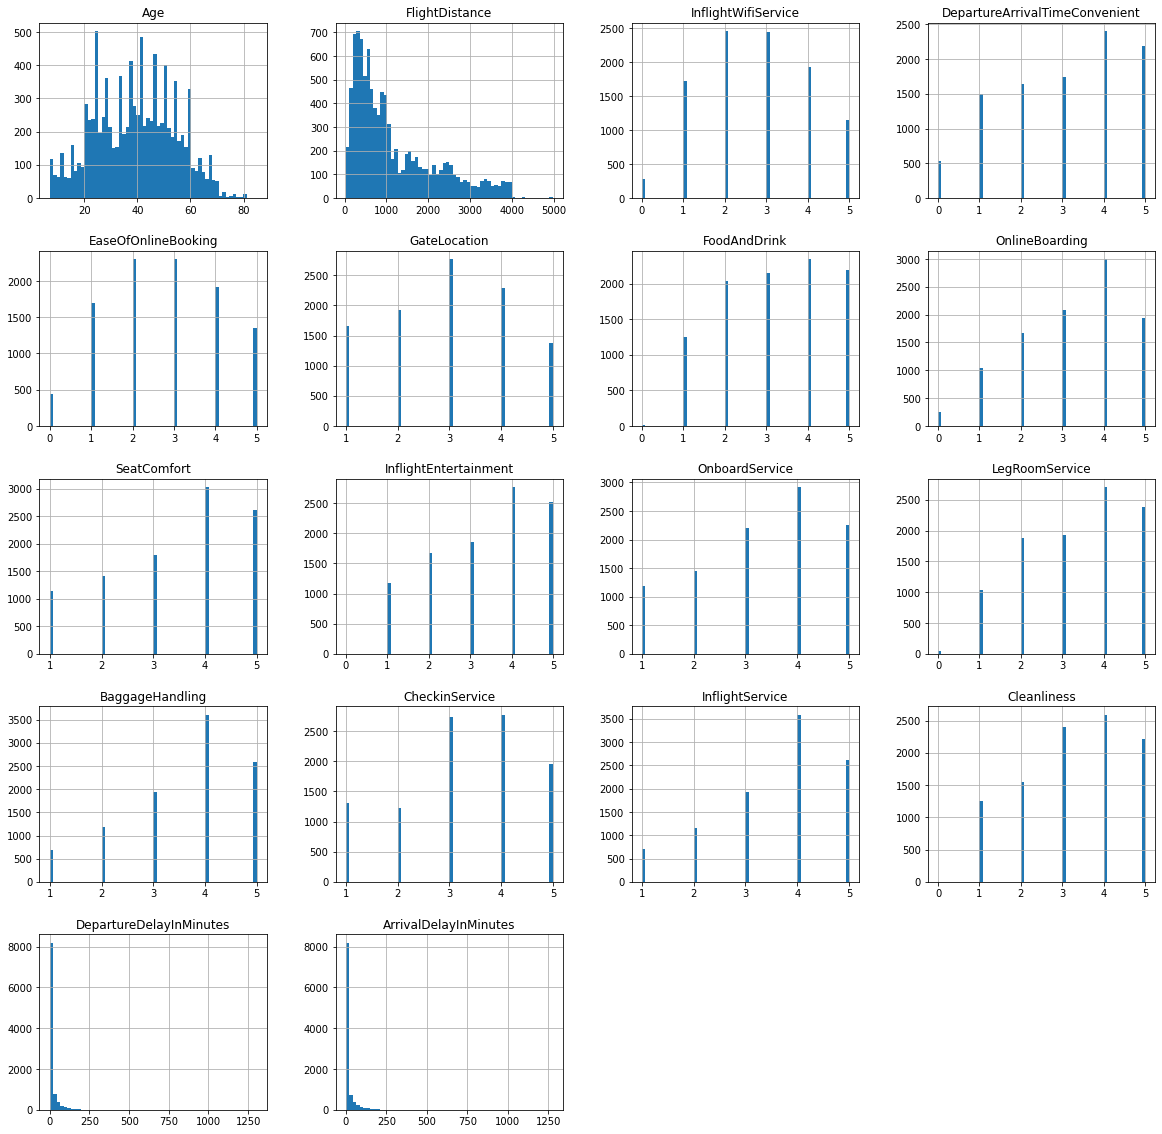

In [ ]:
rawdata.hist(bins=60, figsize=(20,20))

In [ ]:
raw_data=rawdata[rawdata['Age']>80]
raw_data

Gender    CustomerType  Age     TypeOfTravel     Class  FlightDistance  \
5044   Male  Loyal Customer   85  Business travel  Business            2078   

      InflightWifiService  DepartureArrivalTimeConvenient  \
5044                    1                               1   

      EaseOfOnlineBooking  GateLocation  ...  InflightEntertainment  \
5044                    5             1  ...                      3   

      OnboardService  LegRoomService  BaggageHandling  CheckinService  \
5044               4               5                5               4   

      InflightService  Cleanliness  DepartureDelayInMinutes  \
5044                4            4                       82   

      ArrivalDelayInMinutes  satisfaction  
5044                   76.0     satisfied  

[1 rows x 23 columns]

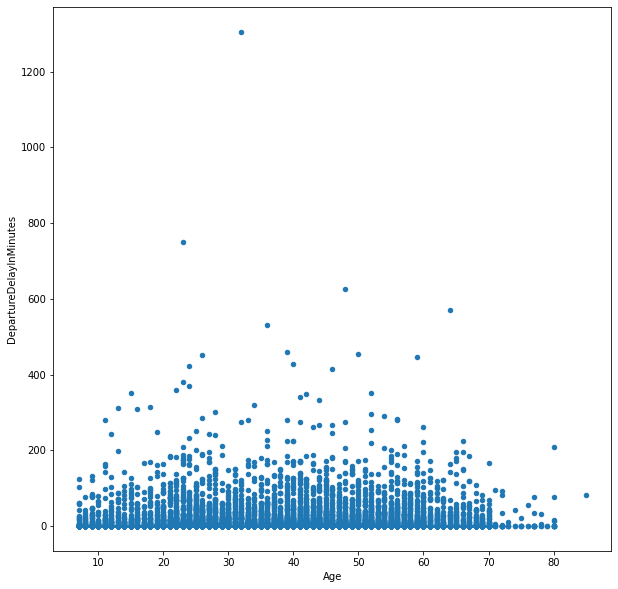

In [ ]:
rawdata.plot(kind='scatter',x='Age',y='DepartureDelayInMinutes',figsize=(10,10))

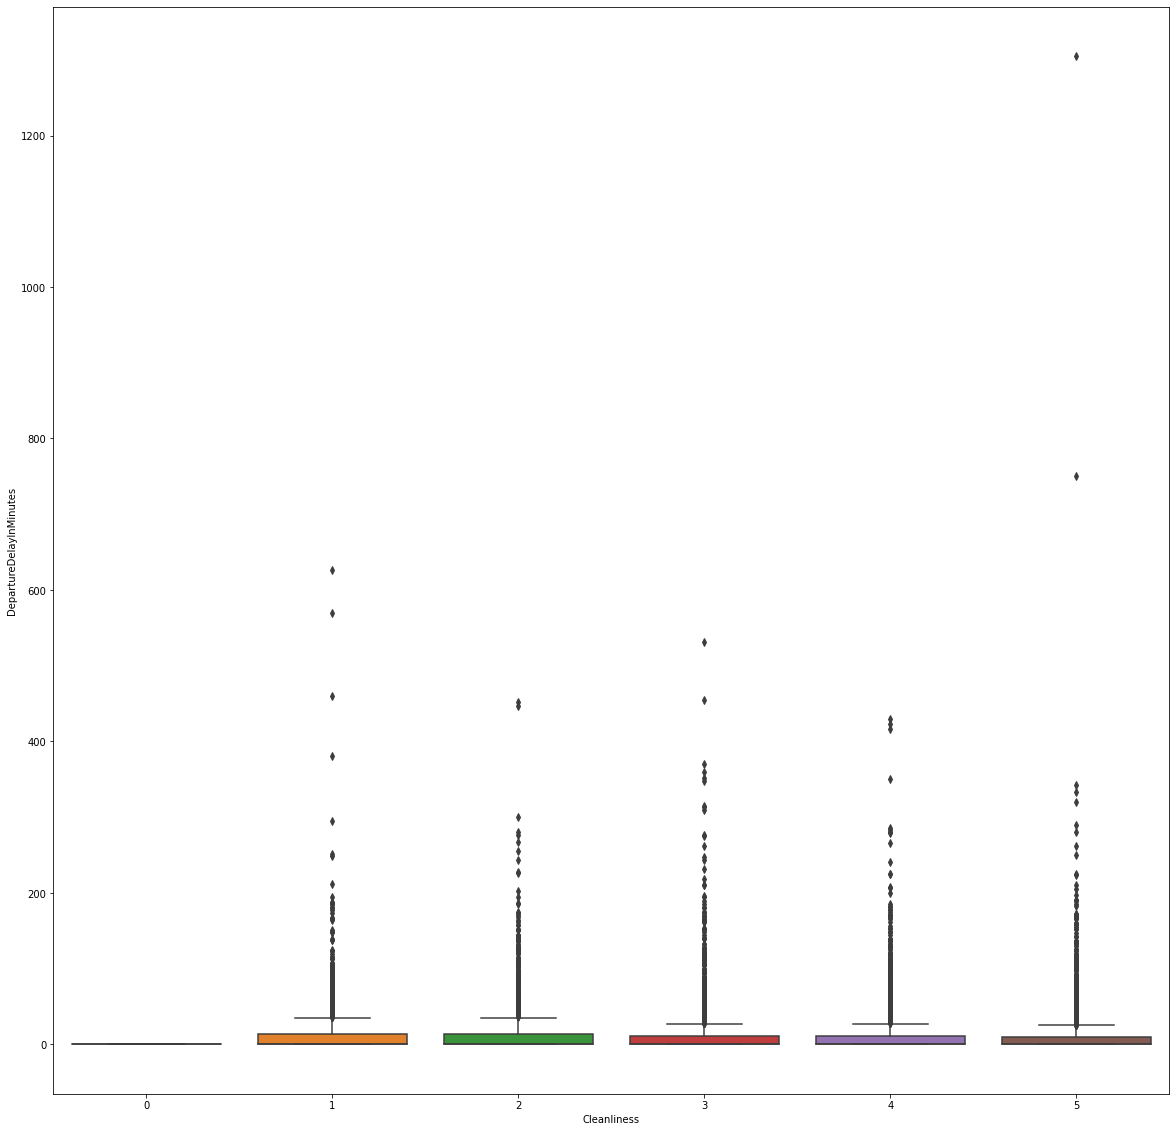

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Cleanliness',y='DepartureDelayInMinutes',data=rawdata)

In [ ]:
rawdata[rawdata['DepartureDelayInMinutes']>500]

Gender    CustomerType  Age     TypeOfTravel     Class  FlightDistance  \
606    Male  Loyal Customer   48  Personal Travel       Eco            2556   
2481   Male  Loyal Customer   32  Business travel  Business            2916   
2748   Male  Loyal Customer   64  Personal Travel  Eco Plus            1956   
7411   Male  Loyal Customer   36  Business travel       Eco             954   
9447   Male  Loyal Customer   23  Business travel       Eco             998   

      InflightWifiService  DepartureArrivalTimeConvenient  \
606                     1                               4   
2481                    2                               2   
2748                    2                               5   
7411                    3                               3   
9447                    5                               2   

      EaseOfOnlineBooking  GateLocation  ...  InflightEntertainment  \
606                     1             4  ...                      3   
2481                    2             2  ...                      3   
2748                    2             4  ...                      5   
7411                    3             3  ...                      1   
9447                    2             2  ...                      1   

      OnboardService  LegRoomService  BaggageHandling  CheckinService  \
606                3               2                2               1   
2481               4               5                4               5   
2748               3               3                5               1   
7411               1               4                2               3   
9447               1               2                4               5   

      InflightService  Cleanliness  DepartureDelayInMinutes  \
606                 2            1                      626   
2481                3            5                     1305   
2748                4            1                      570   
7411                3            3                      531   
9447                1            5                      750   

      ArrivalDelayInMinutes             satisfaction  
606                   604.0  neutral or dissatisfied  
2481                 1280.0                satisfied  
2748                  567.0  neutral or dissatisfied  
7411                  485.0                satisfied  
9447                  729.0                satisfied  

[5 rows x 23 columns]

In [ ]:
OnlineBooking=rawdata[rawdata['LegRoomService']==0]
OnlineBooking

Gender    CustomerType  Age     TypeOfTravel     Class  FlightDistance  \
174   Female  Loyal Customer   44  Personal Travel       Eco             675   
445   Female  Loyal Customer   56  Personal Travel       Eco            1590   
647   Female  Loyal Customer   45  Personal Travel       Eco             417   
724     Male  Loyal Customer   59  Personal Travel  Business            1182   
1493    Male  Loyal Customer   39  Personal Travel  Business             862   
1519  Female  Loyal Customer   51  Personal Travel       Eco             109   
2101  Female  Loyal Customer   61  Personal Travel       Eco             507   
2323    Male  Loyal Customer   46  Business travel  Business            1050   
2383  Female  Loyal Customer   50  Personal Travel  Business             867   
2536  Female  Loyal Customer   69  Personal Travel       Eco            2327   
2776  Female  Loyal Customer   66  Personal Travel       Eco             170   
2894  Female  Loyal Customer   53  Personal Travel       Eco             236   
3038  Female  Loyal Customer   60  Personal Travel       Eco             846   
3138  Female  Loyal Customer   49  Personal Travel       Eco             399   
3340    Male  Loyal Customer   44  Business travel  Business             605   
3344  Female  Loyal Customer   68  Personal Travel       Eco             216   
3365  Female  Loyal Customer   34  Personal Travel  Business             175   
3490  Female  Loyal Customer   37  Business travel  Business            2300   
3620    Male  Loyal Customer   64  Personal Travel  Business             693   
3693  Female  Loyal Customer   45  Personal Travel  Eco Plus            1034   
4169  Female  Loyal Customer   54  Business travel  Business             309   
4377  Female  Loyal Customer   57  Business travel  Business             787   
4652  Female  Loyal Customer   50  Personal Travel       Eco             304   
4705  Female  Loyal Customer   65  Personal Travel       Eco             258   
4882  Female  Loyal Customer   64  Personal Travel       Eco             651   
4921  Female  Loyal Customer   59  Personal Travel       Eco             694   
5086  Female  Loyal Customer   44  Personal Travel       Eco             337   
5123  Female  Loyal Customer   56  Personal Travel       Eco              84   
5635    Male  Loyal Customer   46  Personal Travel  Business             641   
5760  Female  Loyal Customer   64  Personal Travel       Eco             607   
5790  Female  Loyal Customer   69  Personal Travel       Eco             781   
6002  Female  Loyal Customer   45  Personal Travel       Eco             250   
6192  Female  Loyal Customer   54  Personal Travel       Eco             173   
6272  Female  Loyal Customer   49  Personal Travel       Eco             268   
6608  Female  Loyal Customer   65  Personal Travel       Eco            1069   
6667  Female  Loyal Customer   51  Personal Travel       Eco            2165   
6726  Female  Loyal Customer   52  Personal Travel  Eco Plus             247   
6993  Female  Loyal Customer   42  Personal Travel  Eco Plus             125   
8014  Female  Loyal Customer   61  Personal Travel       Eco             134   
8299  Female  Loyal Customer   45  Business travel  Business            3058   
8431  Female  Loyal Customer   64  Personal Travel       Eco             102   
8485  Female  Loyal Customer   69  Personal Travel  Eco Plus             255   
8610  Female  Loyal Customer   55  Personal Travel       Eco             157   
8740  Female  Loyal Customer   61  Personal Travel       Eco            1389   
9343    Male  Loyal Customer   58  Business travel  Business            2340   
9515  Female  Loyal Customer   46  Personal Travel       Eco             187   
9520  Female  Loyal Customer   44  Personal Travel       Eco            1411   
9553    Male  Loyal Customer   38  Business travel  Business            3464   
9687  Female  Loyal Customer   47  Personal Travel  Eco Plus             851   
9759  

In [ ]:
from enum import unique
for column in rawdata:
  unique_values =np.unique(rawdata[column])
  nr_values = len(unique_values)
  if nr_values<=10:
   print("The number of values for feature {} is:{} -- {}".format(column,nr_values,unique_values))
  else:
    print("The number of values for feature {} is:{}".format(column,nr_values))

The number of values for feature Gender is:2 -- ['Female' 'Male']
The number of values for feature CustomerType is:2 -- ['Loyal Customer' 'disloyal Customer']
The number of values for feature Age is:75
The number of values for feature TypeOfTravel is:2 -- ['Business travel' 'Personal Travel']
The number of values for feature Class is:3 -- ['Business' 'Eco' 'Eco Plus']
The number of values for feature FlightDistance is:2387
The number of values for feature InflightWifiService is:6 -- [0 1 2 3 4 5]
The number of values for feature DepartureArrivalTimeConvenient is:6 -- [0 1 2 3 4 5]
The number of values for feature EaseOfOnlineBooking is:6 -- [0 1 2 3 4 5]
The number of values for feature GateLocation is:5 -- [1 2 3 4 5]
The number of values for feature FoodAndDrink is:6 -- [0 1 2 3 4 5]
The number of values for feature OnlineBoarding is:6 -- [0 1 2 3 4 5]
The number of values for feature SeatComfort is:5 -- [1 2 3 4 5]
The number of values for feature InflightEntertainment is:6 -- [0 1 

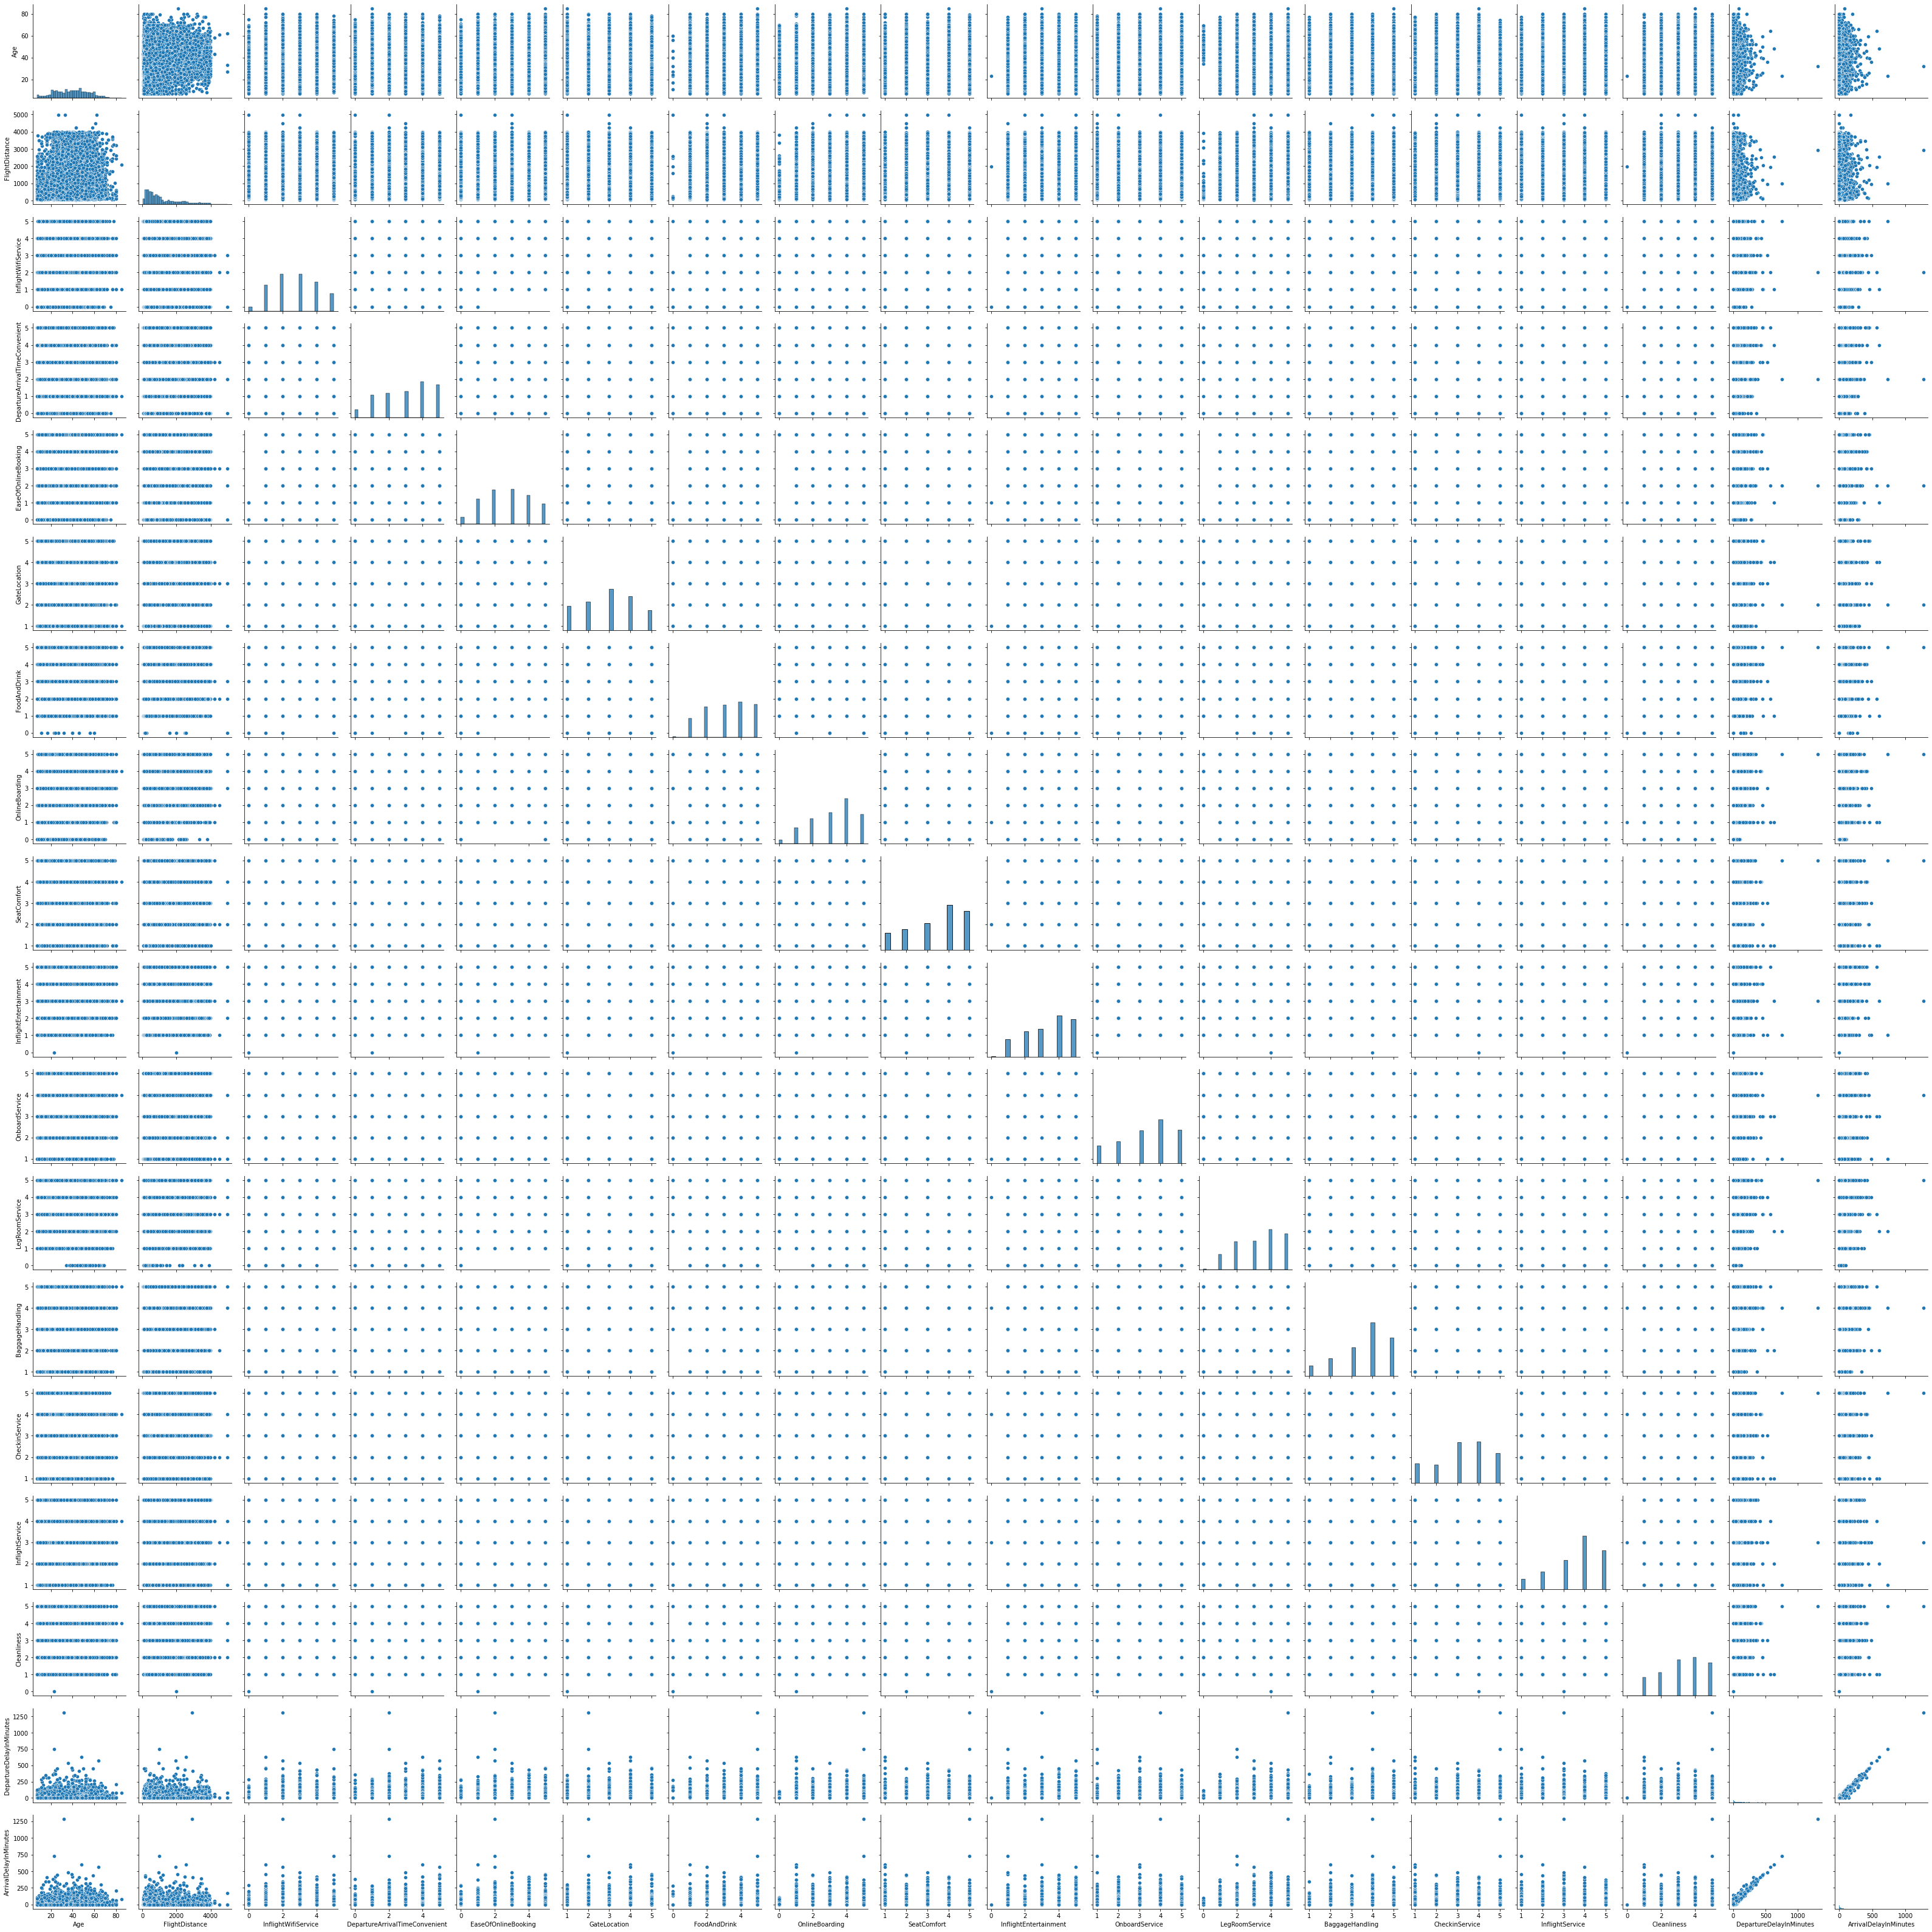

In [ ]:
g= sns.pairplot(rawdata)

In [ ]:
rawdata['FoodAndDrink'].value_counts()

4    2349
5    2197
3    2151
2    2042
1    1250
0      11
Name: FoodAndDrink, dtype: int64

In [ ]:
rawdata['InflightEntertainment'].value_counts()

4    2771
5    2517
3    1858
2    1682
1    1171
0       1
Name: InflightEntertainment, dtype: int64

In [ ]:
rawdata['Cleanliness'].value_counts()

4    2589
3    2402
5    2212
2    1545
1    1251
0       1
Name: Cleanliness, dtype: int64

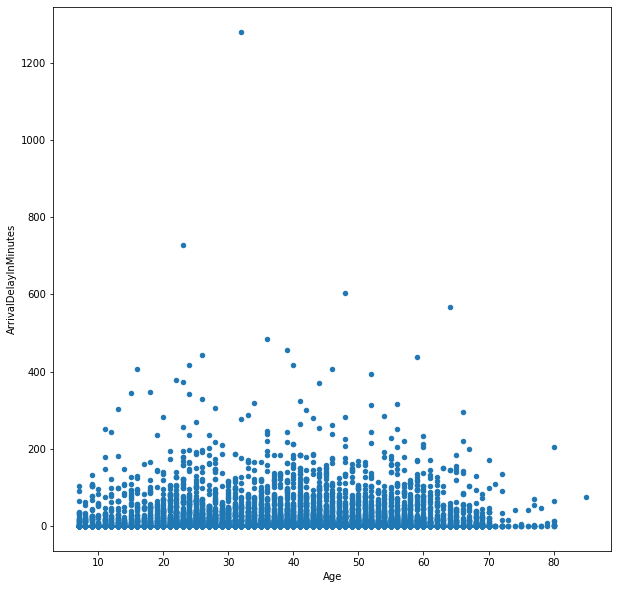

In [ ]:
rawdata.plot(kind='scatter',x='Age',y='ArrivalDelayInMinutes',figsize=(10,10))

In [ ]:
rawdata.columns

Index(['Gender', 'CustomerType', 'Age', 'TypeOfTravel', 'Class',
       'FlightDistance', 'InflightWifiService',
       'DepartureArrivalTimeConvenient', 'EaseOfOnlineBooking', 'GateLocation',
       'FoodAndDrink', 'OnlineBoarding', 'SeatComfort',
       'InflightEntertainment', 'OnboardService', 'LegRoomService',
       'BaggageHandling', 'CheckinService', 'InflightService', 'Cleanliness',
       'DepartureDelayInMinutes', 'ArrivalDelayInMinutes', 'satisfaction'],
      dtype='object')

Data Cleaning (Deleting Outlier)

In [ ]:
ArrivalDelay=rawdata[rawdata['ArrivalDelayInMinutes']>500]
ArrivalDelay

Gender    CustomerType  Age     TypeOfTravel     Class  FlightDistance  \
606    Male  Loyal Customer   48  Personal Travel       Eco            2556   
2481   Male  Loyal Customer   32  Business travel  Business            2916   
2748   Male  Loyal Customer   64  Personal Travel  Eco Plus            1956   
9447   Male  Loyal Customer   23  Business travel       Eco             998   

      InflightWifiService  DepartureArrivalTimeConvenient  \
606                     1                               4   
2481                    2                               2   
2748                    2                               5   
9447                    5                               2   

      EaseOfOnlineBooking  GateLocation  ...  InflightEntertainment  \
606                     1             4  ...                      3   
2481                    2             2  ...                      3   
2748                    2             4  ...                      5   
9447                    2             2  ...                      1   

      OnboardService  LegRoomService  BaggageHandling  CheckinService  \
606                3               2                2               1   
2481               4               5                4               5   
2748               3               3                5               1   
9447               1               2                4               5   

      InflightService  Cleanliness  DepartureDelayInMinutes  \
606                 2            1                      626   
2481                3            5                     1305   
2748                4            1                      570   
9447                1            5                      750   

      ArrivalDelayInMinutes             satisfaction  
606                   604.0  neutral or dissatisfied  
2481                 1280.0                satisfied  
2748                  567.0  neutral or dissatisfied  
9447                  729.0                satisfied  

[4 rows x 23 columns]

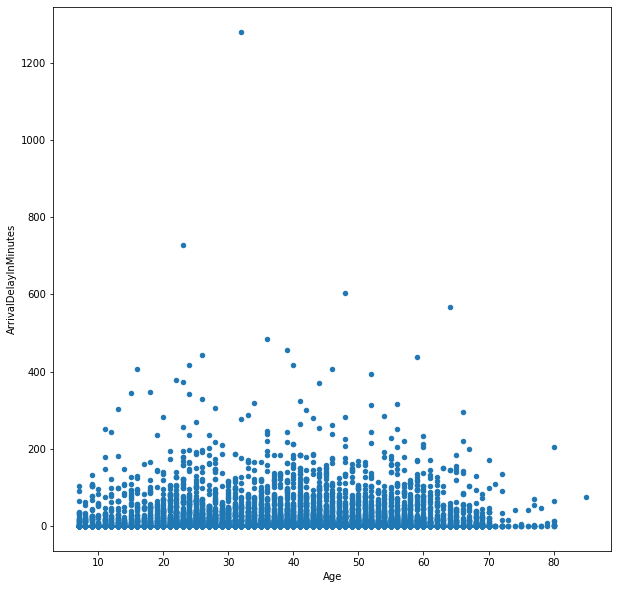

In [ ]:
rawdata.plot(kind='scatter',x='Age',y='ArrivalDelayInMinutes',figsize=(10,10))

In [ ]:
rawdata=rawdata[(rawdata['ArrivalDelayInMinutes']<500) & (rawdata['Age']<80)& (rawdata['DepartureDelayInMinutes']<500)]
rawdata.shape

(9959, 23)

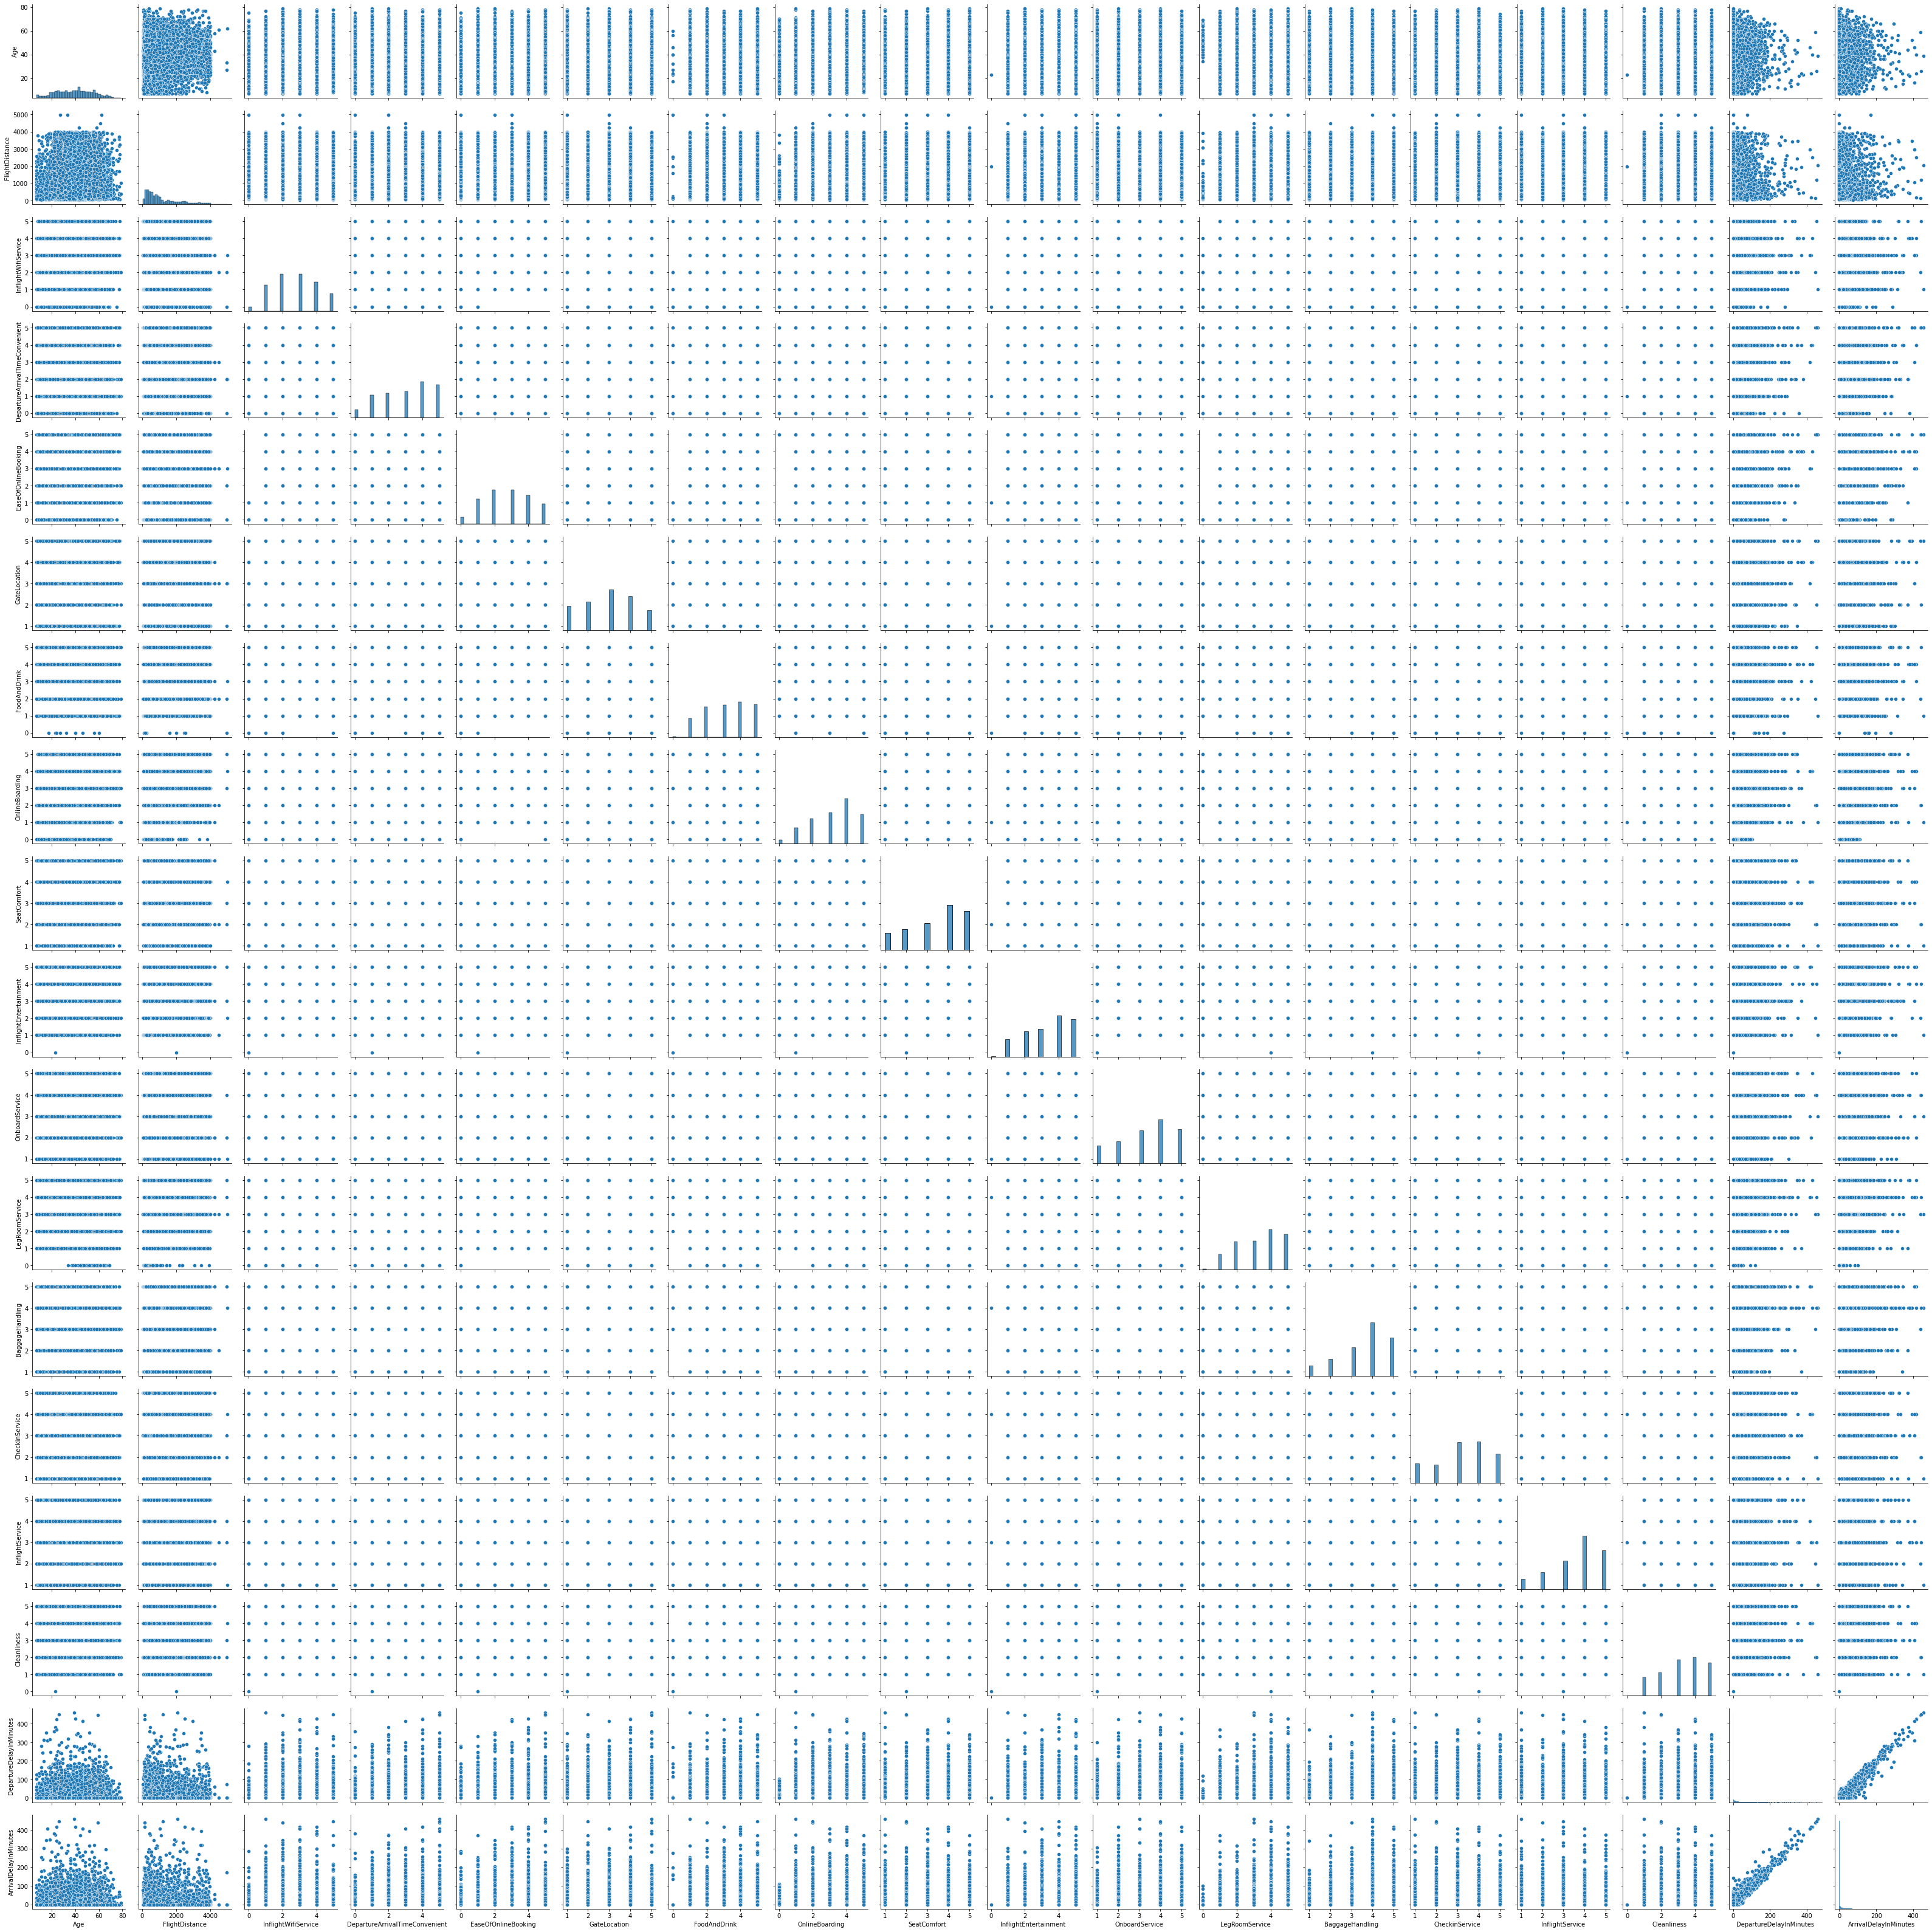

In [ ]:
g=sns.pairplot(rawdata)

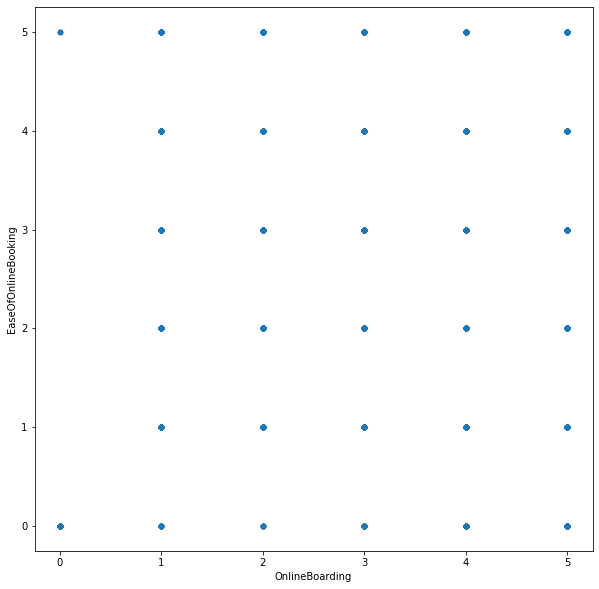

In [ ]:
rawdata.plot(kind='scatter',x='OnlineBoarding',y='EaseOfOnlineBooking',figsize=(10,10))

In [ ]:
FlightD=rawdata[rawdata['FlightDistance']>4000]
FlightD

Gender       CustomerType  Age     TypeOfTravel     Class  \
2511  Female     Loyal Customer   62  Personal Travel  Eco Plus   
2820  Female     Loyal Customer   43  Business travel  Business   
4013  Female     Loyal Customer   58  Personal Travel  Eco Plus   
6085  Female  disloyal Customer   27  Business travel  Business   
6875  Female  disloyal Customer   33  Business travel  Business   
8939  Female     Loyal Customer   43  Business travel  Business   
9581    Male     Loyal Customer   61  Business travel       Eco   

      FlightDistance  InflightWifiService  DepartureArrivalTimeConvenient  \
2511            4983                    3                               2   
2820            4243                    3                               3   
4013            4243                    3                               2   
6085            4963                    0                               0   
6875            4963                    2                               2   
8939            4243                    3                               3   
9581            4502                    2                               3   

      EaseOfOnlineBooking  GateLocation  ...  InflightEntertainment  \
2511                    3             3  ...                      2   
2820                    3             3  ...                      5   
4013                    3             4  ...                      3   
6085                    0             3  ...                      5   
6875                    2             1  ...                      3   
8939                    3             3  ...                      5   
9581                    3             3  ...                      1   

      OnboardService  LegRoomService  BaggageHandling  CheckinService  \
2511               1               3                4               4   
2820               2               4                5               2   
4013               1               3                3               5   
6085               2               4                5               2   
6875               4               5                5               3   
8939               2               4                5               2   
9581               1               3                2               2   

      InflightService  Cleanliness  DepartureDelayInMinutes  \
2511                1            4                        0   
2820                4            2                       21   
4013                2            5                       60   
6085                3            2                        0   
6875                4            3                       75   
8939                4            2                       21   
9581                3            2                        0   

      ArrivalDelayInMinutes             satisfaction  
2511                    0.0  neutral or dissatisfied  
2820                   28.0                satisfied  
4013                   54.0  neutral or dissatisfied  
6085                    0.0                satisfied  
6875                  171.0  neutral or dissatisfied  
8939                   28.0                satisfied  
9581                    0.0  neutral or dissatisfied  

[7 rows x 23 columns]

In [ ]:
rawdata.shape

(9959, 23)

In [ ]:
rawdata1=rawdata[(rawdata['FlightDistance']<4000)]
rawdata1.shape

(9950, 23)

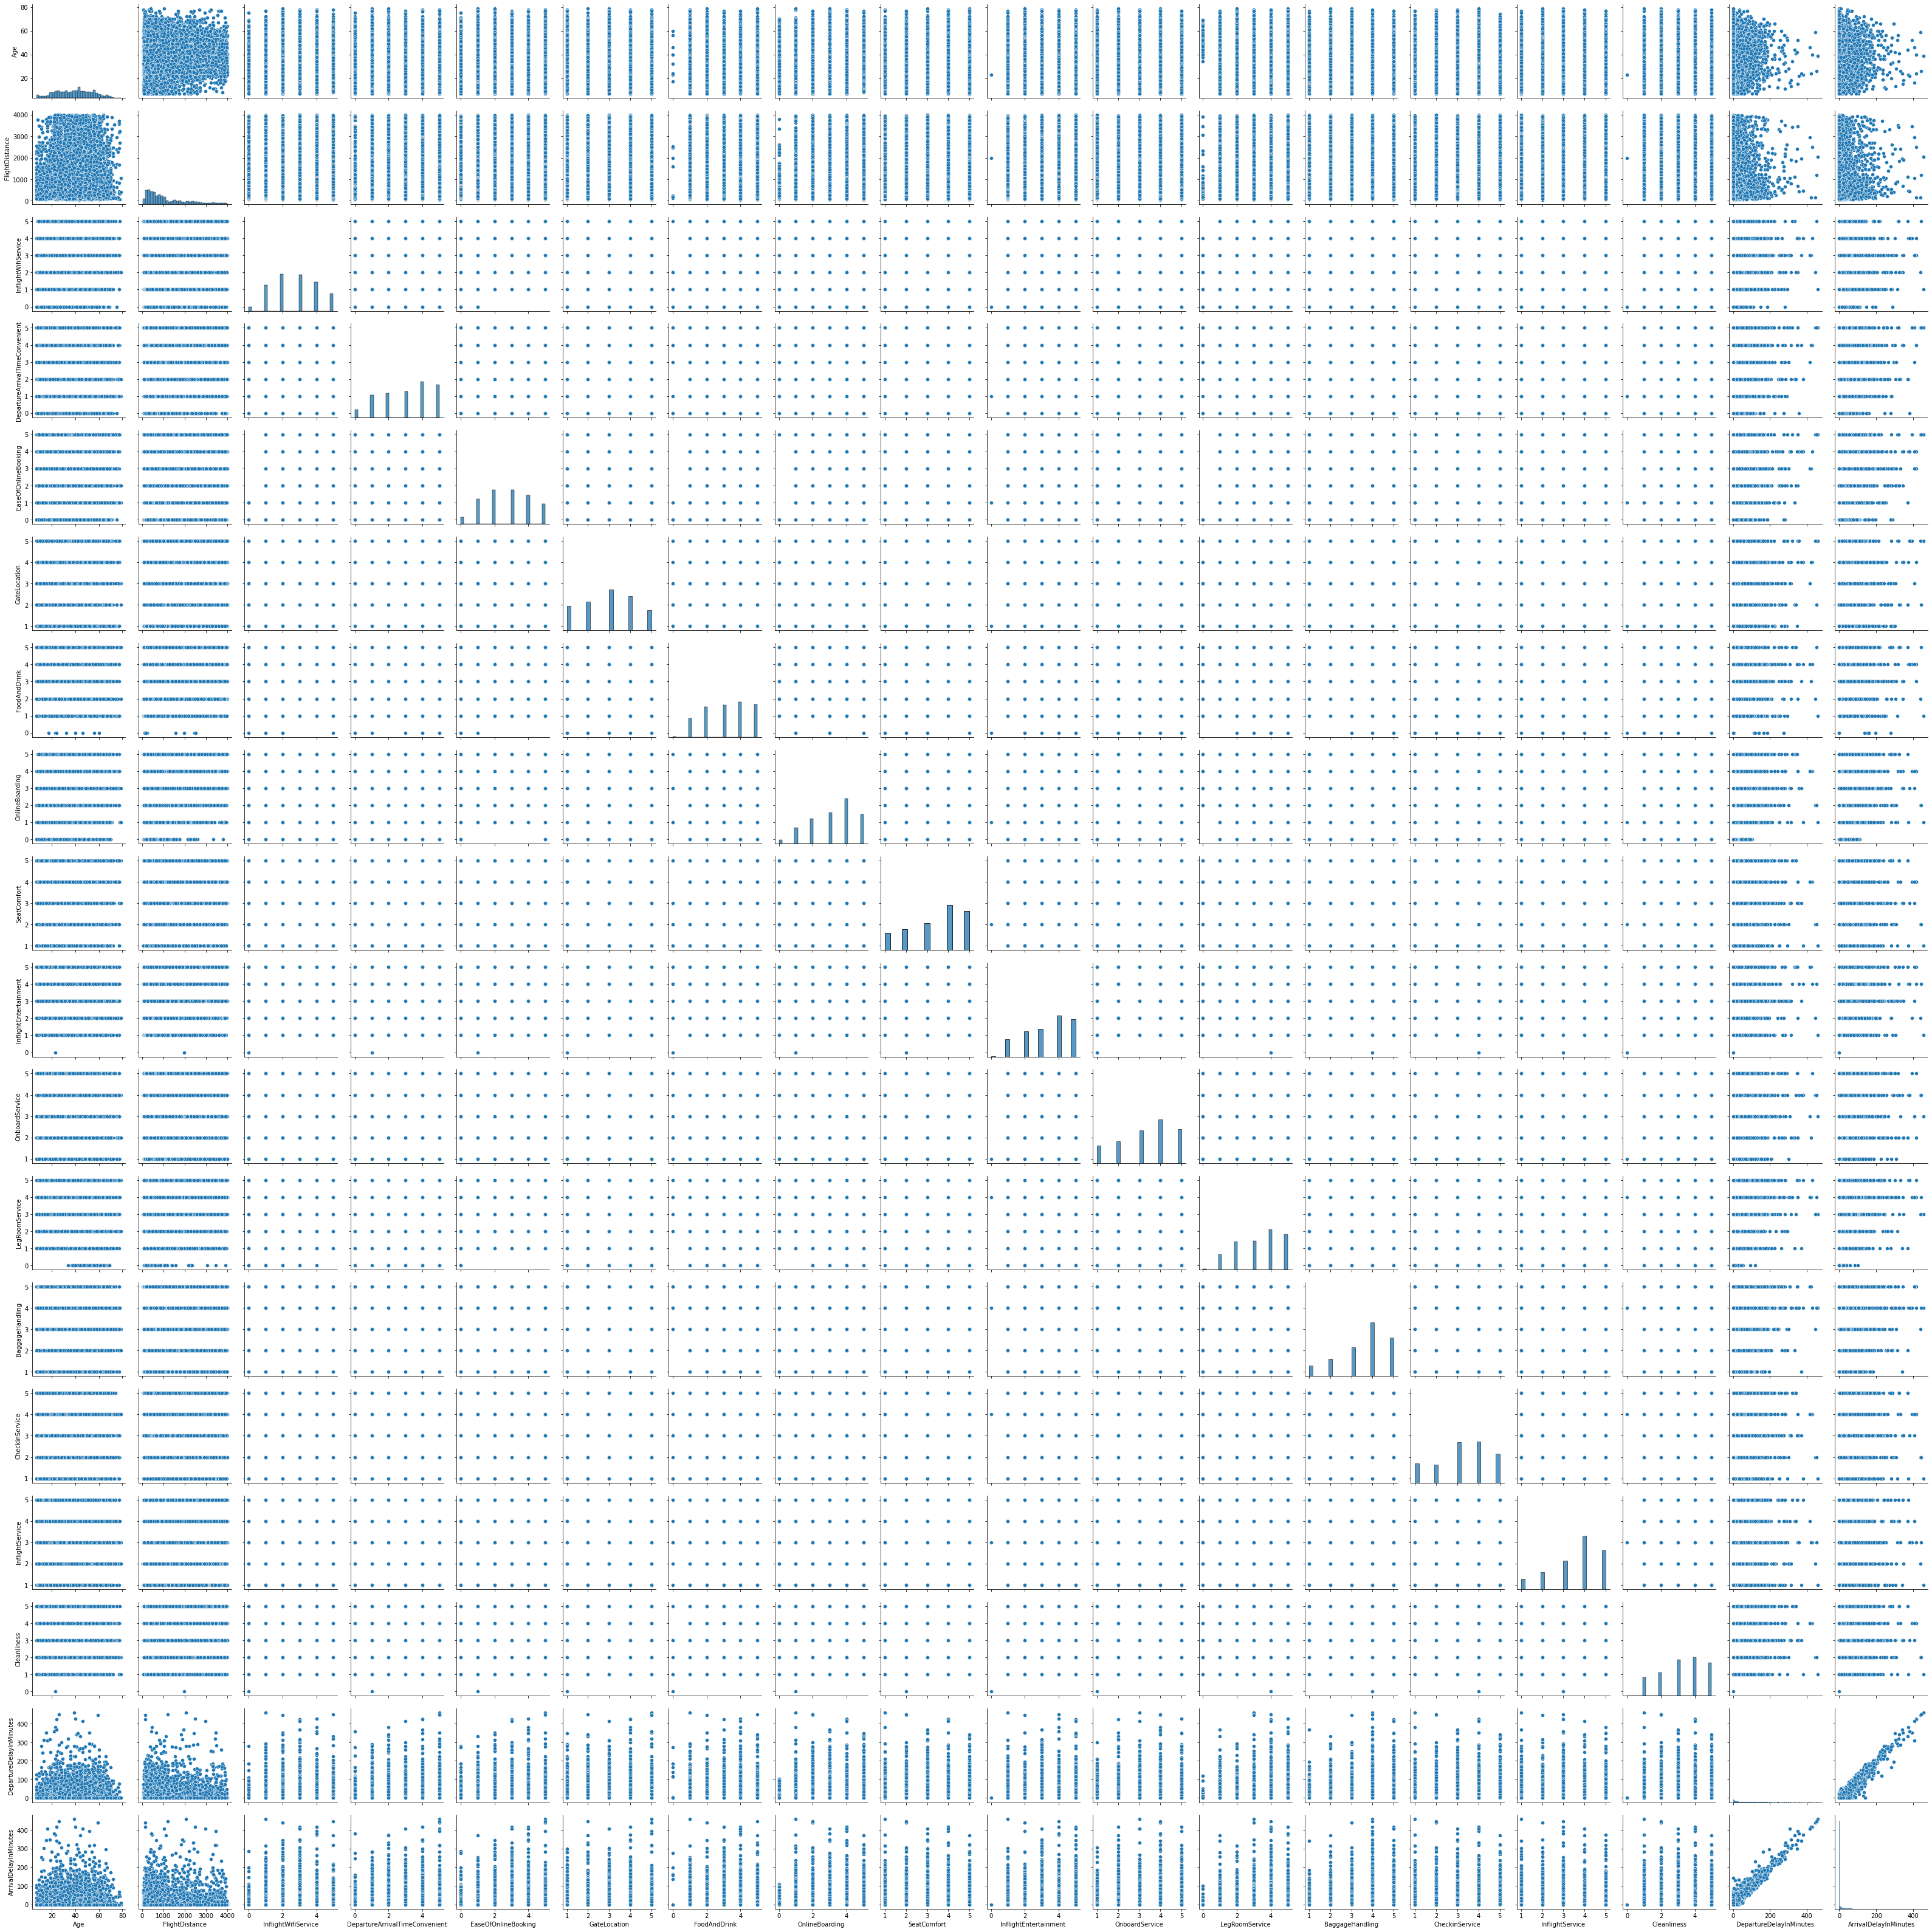

In [ ]:
g=sns.pairplot(rawdata1)

In [ ]:
rawdata1['InflightEntertainment'].value_counts()

4    2757
5    2507
3    1849
2    1674
1    1162
0       1
Name: InflightEntertainment, dtype: int64

In [ ]:
rawdata1['FoodAndDrink']=rawdata1['FoodAndDrink'].replace([0],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rawdata1['FoodAndDrink'].value_counts()

4    2336
5    2187
3    2143
2    2032
1    1252
Name: FoodAndDrink, dtype: int64

In [ ]:
rawdata1['Cleanliness'].value_counts()

4    2576
3    2391
5    2201
2    1538
1    1243
0       1
Name: Cleanliness, dtype: int64

In [ ]:
rawdata1['Cleanliness']=rawdata1['Cleanliness'].replace([0],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rawdata1['Cleanliness'].value_counts()

4    2576
3    2391
5    2201
2    1538
1    1244
Name: Cleanliness, dtype: int64

In [ ]:
rawdata1['LegRoomService'].value_counts()

4    2692
5    2379
3    1923
2    1867
1    1038
0      51
Name: LegRoomService, dtype: int64

In [ ]:
rawdata1['InflightEntertainment']=rawdata1['InflightEntertainment'].replace([0],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rawdata1['InflightEntertainment'].value_counts()

4    2757
5    2507
3    1849
2    1674
1    1163
Name: InflightEntertainment, dtype: int64

In [ ]:
rawdata1.shape

(9950, 23)

In [ ]:
rawdata1.describe()

Age  FlightDistance  InflightWifiService  \
count  9950.00000     9950.000000          9950.000000   
mean     39.10603     1173.473065             2.749347   
std      14.94888      984.518425             1.335132   
min       7.00000       31.000000             0.000000   
25%      27.00000      408.000000             2.000000   
50%      40.00000      837.500000             3.000000   
75%      51.00000     1727.000000             4.000000   
max      79.00000     3998.000000             5.000000   

       DepartureArrivalTimeConvenient  EaseOfOnlineBooking  GateLocation  \
count                     9950.000000          9950.000000   9950.000000   
mean                         3.055578             2.762714      2.981106   
std                          1.535399             1.406330      1.277878   
min                          0.000000             0.000000      1.000000   
25%                          2.000000             2.000000      2.000000   
50%                          3.000000             3.000000      3.000000   
75%                          4.000000             4.000000      4.000000   
max                          5.000000             5.000000      5.000000   

       FoodAndDrink  OnlineBoarding  SeatComfort  InflightEntertainment  \
count   9950.000000     9950.000000  9950.000000            9950.000000   
mean       3.218492        3.235176     3.456080               3.378995   
std        1.331896        1.356449     1.317606               1.333134   
min        1.000000        0.000000     1.000000               1.000000   
25%        2.000000        2.000000     2.000000               2.000000   
50%        3.000000        3.000000     4.000000               4.000000   
75%        4.000000        4.000000     5.000000               5.000000   
max        5.000000        5.000000     5.000000               5.000000   

       OnboardService  LegRoomService  BaggageHandling  CheckinService  \
count     9950.000000     9950.000000      9950.000000     9950.000000   
mean         3.363719        3.337085         3.619497        3.286231   
std          1.295542        1.328360         1.184864        1.275294   
min          1.000000        0.000000         1.000000        1.000000   
25%          2.000000        2.000000         3.000000        2.000000   
50%          4.000000        4.000000         4.000000        3.000000   
75%          4.000000        4.000000         5.000000        4.000000   
max          5.000000        5.000000         5.000000        5.000000   

       InflightService  Cleanliness  DepartureDelayInMinutes  \
count      9950.000000  9950.000000              9950.000000   
mean          3.625427     3.296683                14.423920   
std           1.188233     1.307877                35.474399   
min           1.000000     1.000000                 0.000000   
25%           3.000000     2.000000                 0.000000   
50%           4.000000     3.000000                 0.000000   
75%           5.000000     4.000000                11.000000   
max           5.000000     5.000000               460.000000   

       ArrivalDelayInMinutes  
count            9950.000000  
mean               14.783015  
std                36.149449  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                12.000000  
max               457.000000

In [ ]:
rawdata1['ArrivalDelayInMinutes'].fillna(value=rawdata1['ArrivalDelayInMinutes'].mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
rawdata1[rawdata1['ArrivalDelayInMinutes'].isna()]

Empty DataFrame
Columns: [Gender, CustomerType, Age, TypeOfTravel, Class, FlightDistance, InflightWifiService, DepartureArrivalTimeConvenient, EaseOfOnlineBooking, GateLocation, FoodAndDrink, OnlineBoarding, SeatComfort, InflightEntertainment, OnboardService, LegRoomService, BaggageHandling, CheckinService, InflightService, Cleanliness, DepartureDelayInMinutes, ArrivalDelayInMinutes, satisfaction]
Index: []

[0 rows x 23 columns]

In [ ]:
rawdata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9950 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          9950 non-null   object 
 1   CustomerType                    9950 non-null   object 
 2   Age                             9950 non-null   int64  
 3   TypeOfTravel                    9950 non-null   object 
 4   Class                           9950 non-null   object 
 5   FlightDistance                  9950 non-null   int64  
 6   InflightWifiService             9950 non-null   int64  
 7   DepartureArrivalTimeConvenient  9950 non-null   int64  
 8   EaseOfOnlineBooking             9950 non-null   int64  
 9   GateLocation                    9950 non-null   int64  
 10  FoodAndDrink                    9950 non-null   int64  
 11  OnlineBoarding                  9950 non-null   int64  
 12  SeatComfort                     99

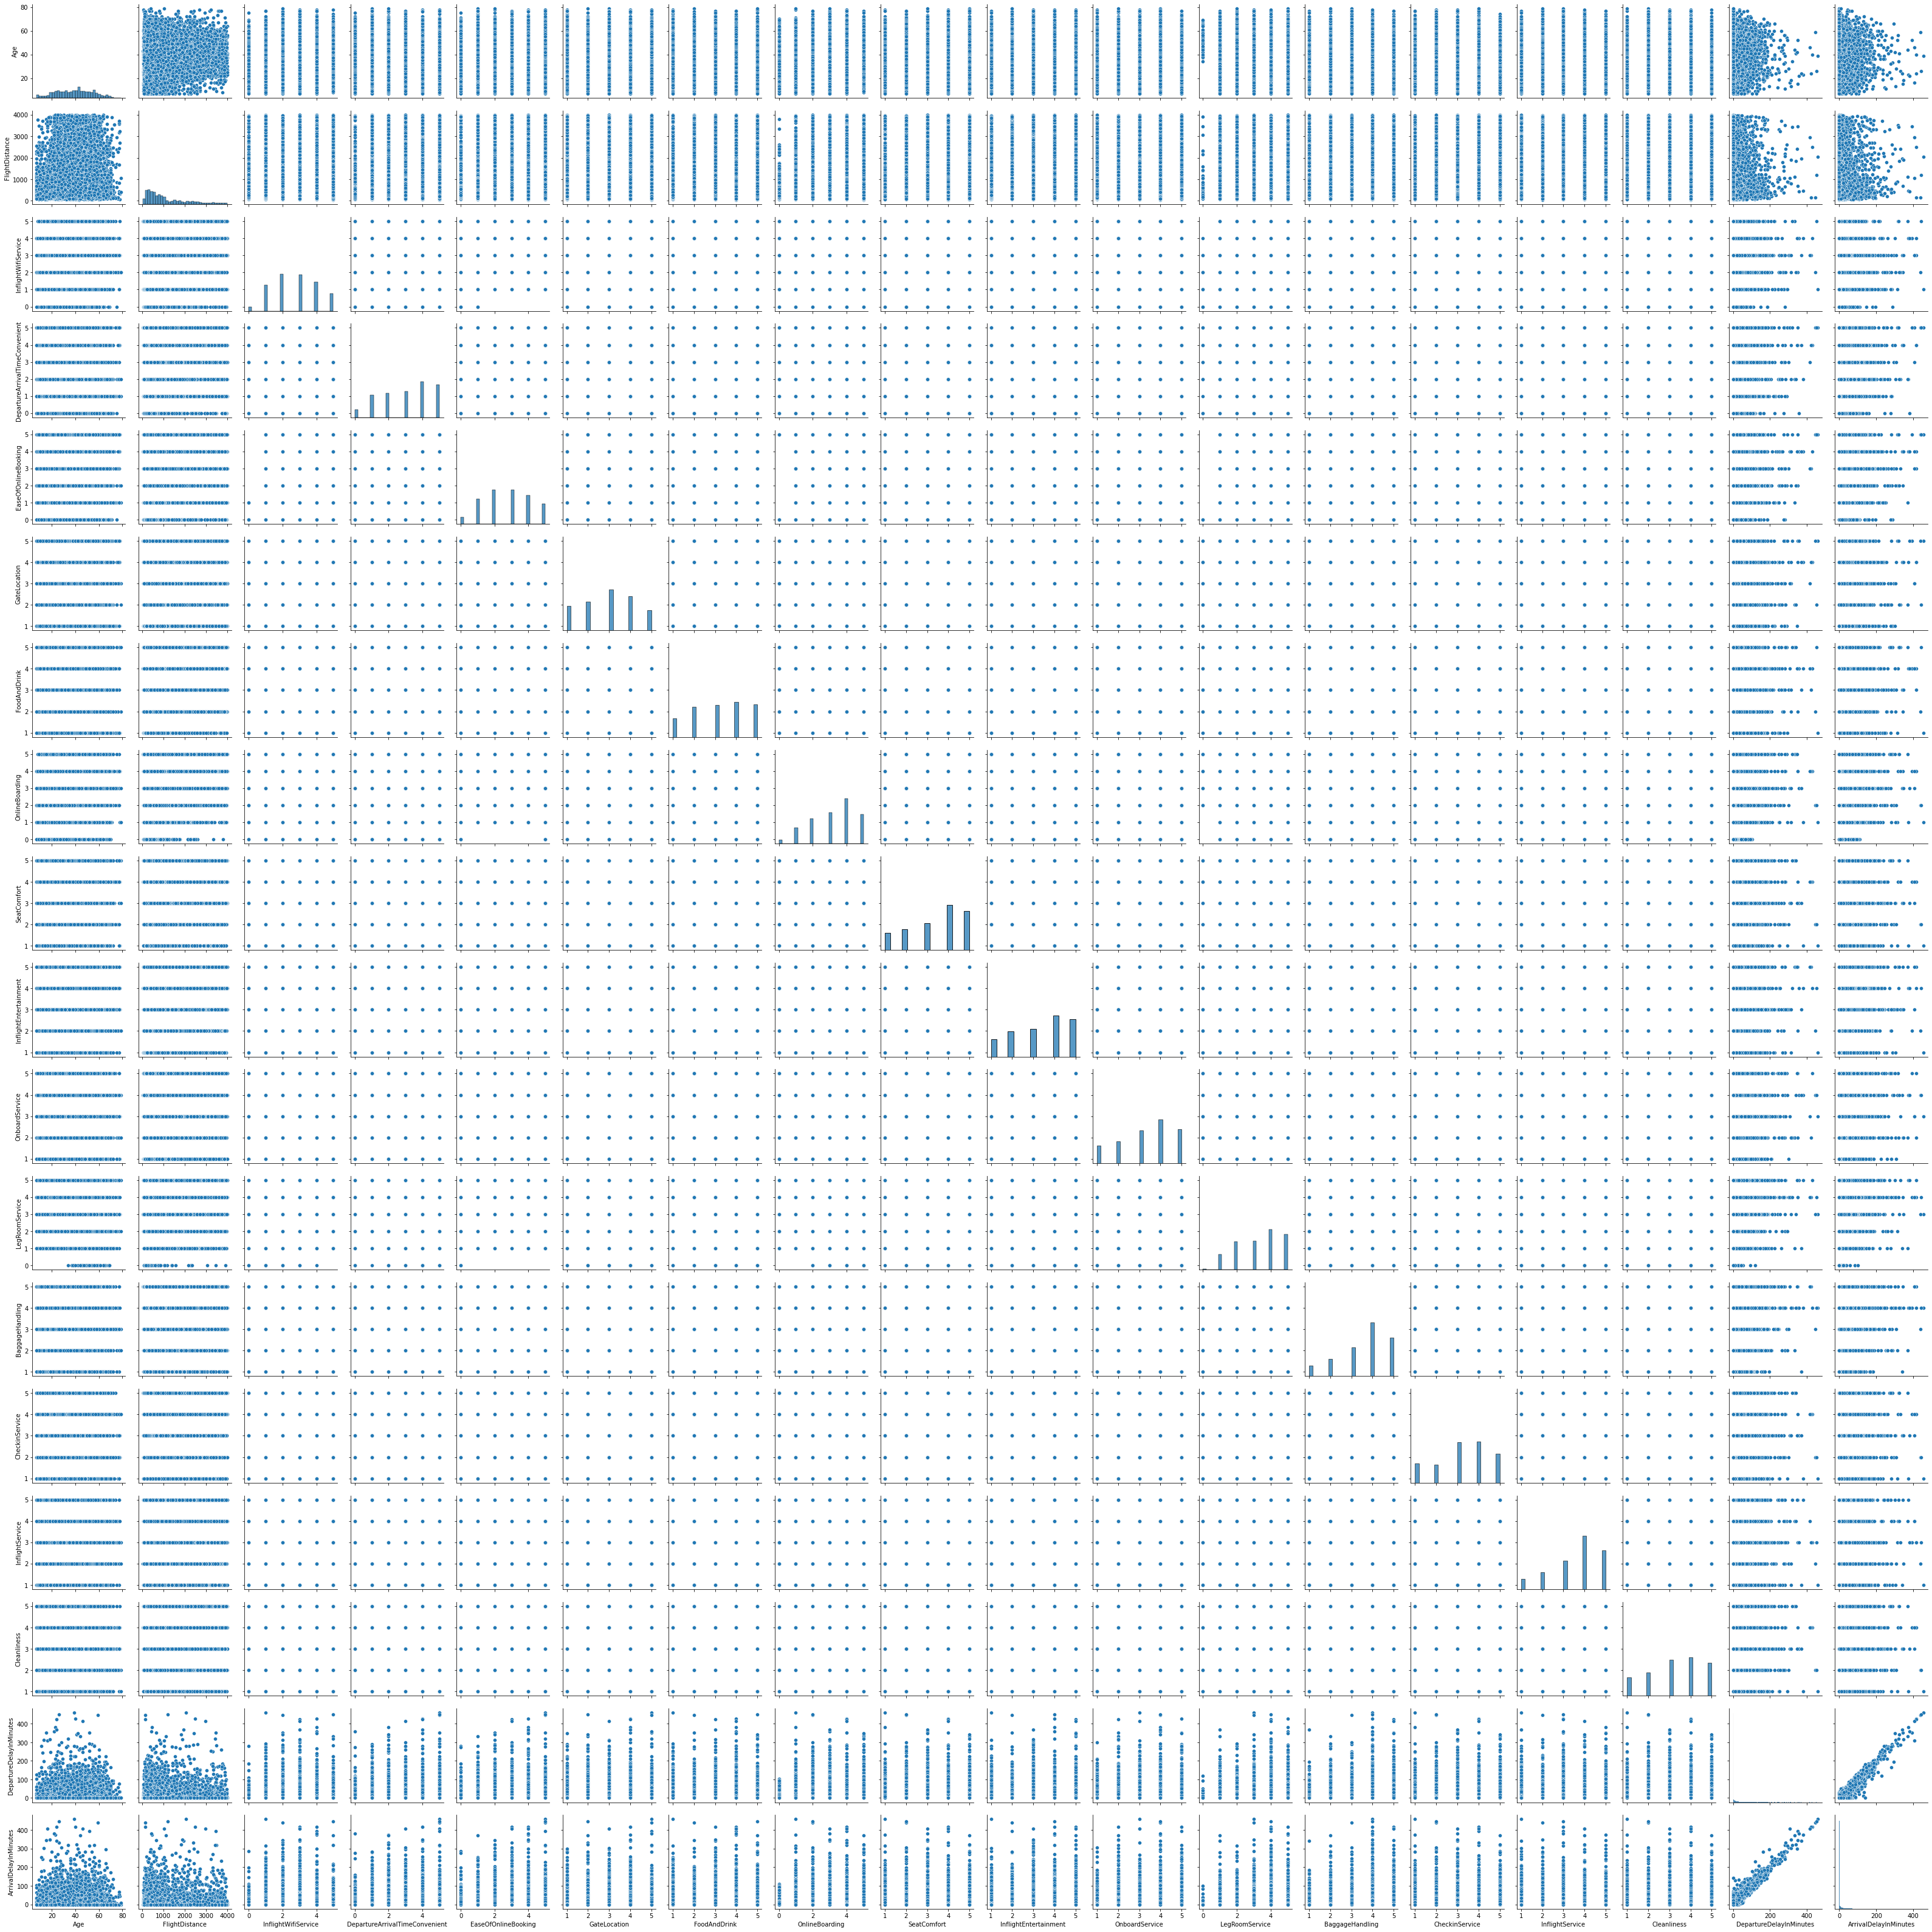

In [ ]:
g= sns.pairplot(rawdata1)

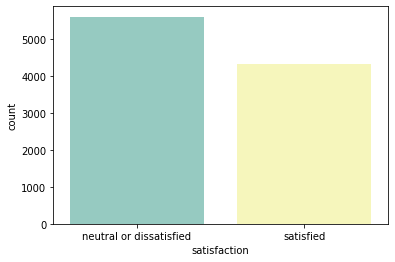

In [ ]:
sns.countplot(x='satisfaction',data=rawdata1,palette='Set3')

In [ ]:
rawdata1.columns

Index(['Gender', 'CustomerType', 'Age', 'TypeOfTravel', 'Class',
       'FlightDistance', 'InflightWifiService',
       'DepartureArrivalTimeConvenient', 'EaseOfOnlineBooking', 'GateLocation',
       'FoodAndDrink', 'OnlineBoarding', 'SeatComfort',
       'InflightEntertainment', 'OnboardService', 'LegRoomService',
       'BaggageHandling', 'CheckinService', 'InflightService', 'Cleanliness',
       'DepartureDelayInMinutes', 'ArrivalDelayInMinutes', 'satisfaction'],
      dtype='object')

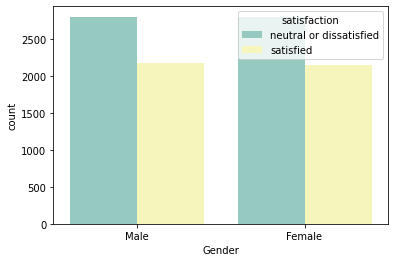

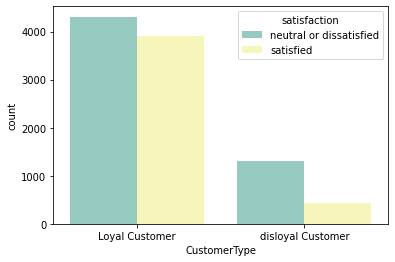

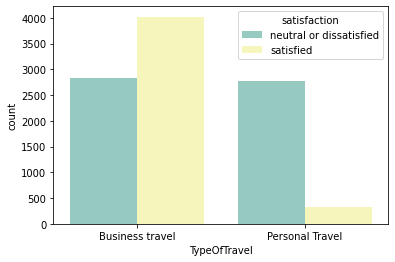

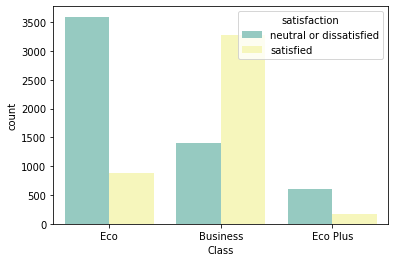

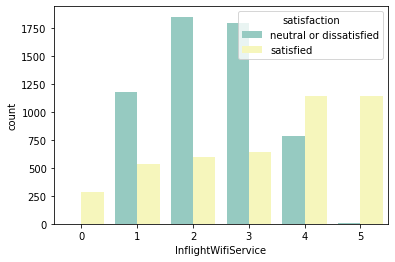

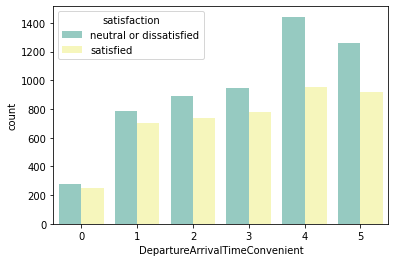

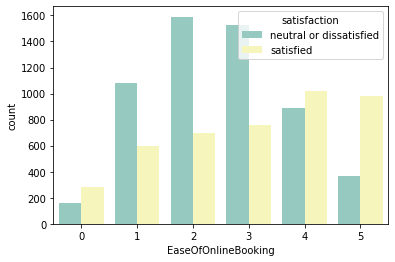

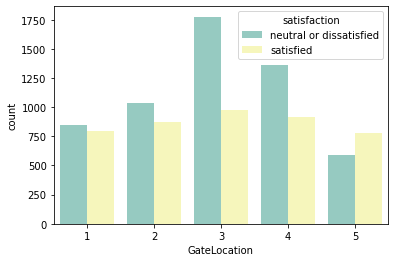

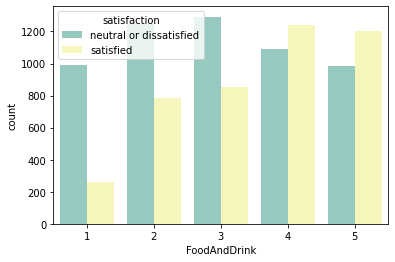

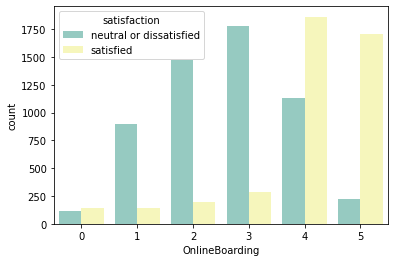

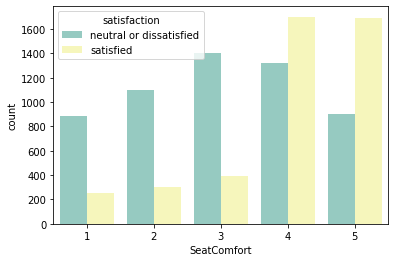

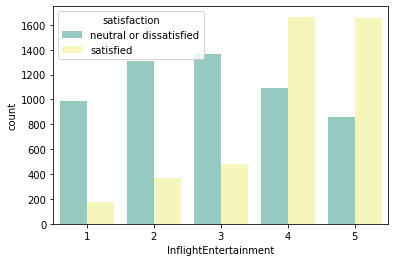

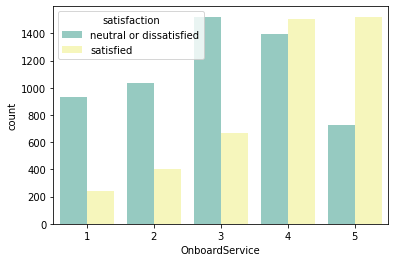

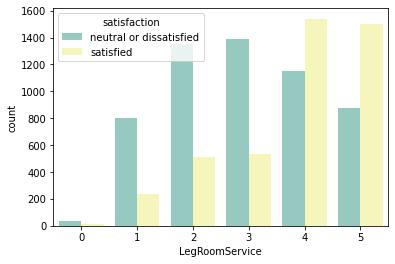

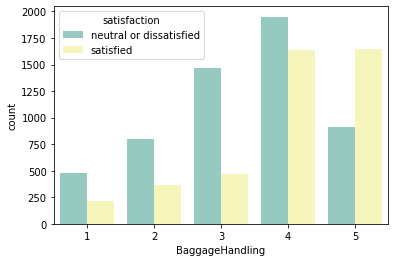

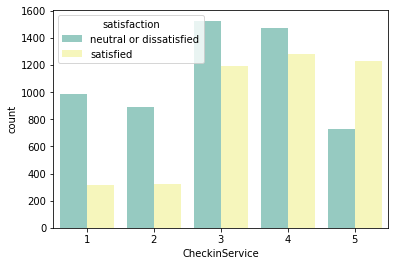

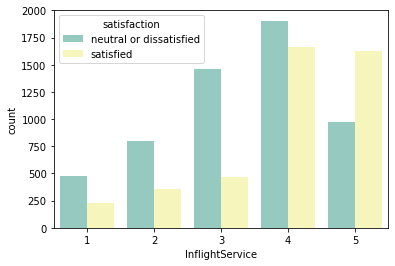

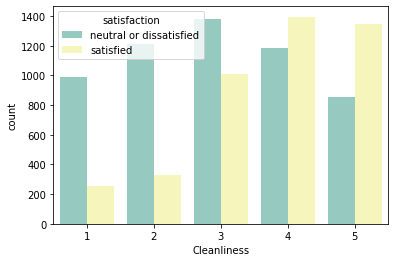

In [ ]:
features =['Gender', 'CustomerType', 'TypeOfTravel', 'Class','InflightWifiService',
       'DepartureArrivalTimeConvenient', 'EaseOfOnlineBooking', 'GateLocation',
       'FoodAndDrink', 'OnlineBoarding', 'SeatComfort',
       'InflightEntertainment', 'OnboardService', 'LegRoomService',
       'BaggageHandling', 'CheckinService', 'InflightService', 'Cleanliness']

for f in features:
  sns.countplot(x=f,data=rawdata1,palette='Set3',hue = 'satisfaction')
  plt.show()

In [ ]:
rawdata1.head()

Gender    CustomerType  Age     TypeOfTravel     Class  FlightDistance  \
0   Male  Loyal Customer   62  Business travel       Eco             458   
1   Male  Loyal Customer   37  Personal Travel       Eco             200   
2   Male  Loyal Customer   22  Personal Travel       Eco             488   
3   Male  Loyal Customer   50  Business travel  Business            3572   
4   Male  Loyal Customer   38  Business travel  Business             224   

   InflightWifiService  DepartureArrivalTimeConvenient  EaseOfOnlineBooking  \
0                    3                               1                    1   
1                    2                               5                    2   
2                    1                               4                    1   
3                    2                               2                    2   
4                    1                               1                    1   

   GateLocation  ...  InflightEntertainment  OnboardService  LegRoomService  \
0             1  ...                      2               3               4   
1             2  ...                      4               2               2   
2             3  ...                      5               3               3   
3             2  ...                      4               4               4   
4             1  ...                      1               1               1   

   BaggageHandling  CheckinService  InflightService  Cleanliness  \
0                3               1                3            2   
1                1               3                2            4   
2                5               5                5            5   
3                4               3                4            4   
4                1               1                1            1   

   DepartureDelayInMinutes  ArrivalDelayInMinutes             satisfaction  
0                        5                    3.0  neutral or dissatisfied  
1                       14                   14.0  neutral or dissatisfied  
2                       12                   16.0  neutral or dissatisfied  
3                        0                    0.0                satisfied  
4                        9                    5.0  neutral or dissatisfied  

[5 rows x 23 columns]

In [ ]:
new_raw_data=pd.get_dummies(rawdata1, columns=features)
new_raw_data

Age  FlightDistance  DepartureDelayInMinutes  ArrivalDelayInMinutes  \
0      62             458                        5                    3.0   
1      37             200                       14                   14.0   
2      22             488                       12                   16.0   
3      50            3572                        0                    0.0   
4      38             224                        9                    5.0   
...   ...             ...                      ...                    ...   
9995   22            2252                        0                    0.0   
9996   49            3752                        0                    0.0   
9997   52             409                       36                  103.0   
9998   23             874                        0                    0.0   
9999   38             102                        0                   10.0   

                 satisfaction  Gender_Female  Gender_Male  \
0     neutral or dissatisfied              0            1   
1     neutral or dissatisfied              0            1   
2     neutral or dissatisfied              0            1   
3                   satisfied              0            1   
4     neutral or dissatisfied              0            1   
...                       ...            ...          ...   
9995                satisfied              0            1   
9996  neutral or dissatisfied              0            1   
9997                satisfied              1            0   
9998                satisfied              0            1   
9999  neutral or dissatisfied              0            1   

      CustomerType_Loyal Customer  CustomerType_disloyal Customer  \
0                               1                               0   
1                               1                               0   
2                               1                               0   
3                               1                               0   
4                               1                               0   
...                           ...                             ...   
9995                            1                               0   
9996                            1                               0   
9997                            1                               0   
9998                            0                               1   
9999                            1                               0   

      TypeOfTravel_Business travel  ...  InflightService_1  InflightService_2  \
0                                1  ...                  0                  0   
1                                0  ...                  0                  1   
2                                0  ...                  0                  0   
3                                1  ...                  0                  0   
4                                1  ...                  1                  0   
...                            ...  ...                ...                ...   
9995                             1  ...                  0                  0   
9996                             1  ...                  0                  0   
9997                             1  ...                  0                  0   
9998                             1  ...                  0                  0   
9999                             1  ...                  0                  0   

      InflightService_3  InflightService_4  InflightService_5  Cleanliness_1  \
0                     1                  0                  0              0   
1                     0                  0                  0              0   
2                     0                  0                  1              0   
3                     0                  1                  0              0   
4                     0                  0                  0              1   
...                 ...                ...                ...     

In [ ]:
print(rawdata1.shape)
print(new_raw_data.shape)

(9950, 23)
(9950, 89)


In [ ]:
new_raw_data['satisfaction'][new_raw_data['satisfaction'] == 'satisfied']=1
new_raw_data['satisfaction'][new_raw_data['satisfaction'] == 'neutral or dissatisfied']=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
new_raw_data

Age  FlightDistance  DepartureDelayInMinutes  ArrivalDelayInMinutes  \
0      62             458                        5                    3.0   
1      37             200                       14                   14.0   
2      22             488                       12                   16.0   
3      50            3572                        0                    0.0   
4      38             224                        9                    5.0   
...   ...             ...                      ...                    ...   
9995   22            2252                        0                    0.0   
9996   49            3752                        0                    0.0   
9997   52             409                       36                  103.0   
9998   23             874                        0                    0.0   
9999   38             102                        0                   10.0   

     satisfaction  Gender_Female  Gender_Male  CustomerType_Loyal Customer  \
0               0              0            1                            1   
1               0              0            1                            1   
2               0              0            1                            1   
3               1              0            1                            1   
4               0              0            1                            1   
...           ...            ...          ...                          ...   
9995            1              0            1                            1   
9996            0              0            1                            1   
9997            1              1            0                            1   
9998            1              0            1                            0   
9999            0              0            1                            1   

      CustomerType_disloyal Customer  TypeOfTravel_Business travel  ...  \
0                                  0                             1  ...   
1                                  0                             0  ...   
2                                  0                             0  ...   
3                                  0                             1  ...   
4                                  0                             1  ...   
...                              ...                           ...  ...   
9995                               0                             1  ...   
9996                               0                             1  ...   
9997                               0                             1  ...   
9998                               1                             1  ...   
9999                               0                             1  ...   

      InflightService_1  InflightService_2  InflightService_3  \
0                     0                  0                  1   
1                     0                  1                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     1                  0                  0   
...                 ...                ...                ...   
9995                  0                  0                  0   
9996                  0                  0                  0   
9997                  0                  0                  0   
9998                  0                  0                  0   
9999                  0                  0                  1   

      InflightService_4  InflightService_5  Cleanliness_1  Cleanliness_2  \
0                     0                  0              0              1   
1                     0                  0              0              0   
2                     0                  1              0              0   
3                     1                  0              0              0   
4                     0                  0              1              0   
...   

In [ ]:
x=new_raw_data.drop('satisfaction', axis=1).values
y= new_raw_data['satisfaction']

y=y.astype(int)
print(x.shape)
print(y.shape)


(9950, 88)
(9950,)


In [ ]:
from pandas.core.common import random_state
dt=DecisionTreeClassifier(random_state=15,criterion='entropy', max_depth=10)
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [ ]:
fi_col =[]
fi = []

for i,column in enumerate(new_raw_data.drop('satisfaction', axis=1)):
  print("The feature important for{} is: {}".format(column, dt.feature_importances_[i]))

  fi_col.append(column)
  fi.append(dt.feature_importances_[i])

The feature important forAge is: 0.014425439104907638
The feature important forFlightDistance is: 0.0139707920049021
The feature important forDepartureDelayInMinutes is: 0.002756190525869043
The feature important forArrivalDelayInMinutes is: 0.003679364901577817
The feature important forGender_Female is: 0.0016757513875199693
The feature important forGender_Male is: 0.0
The feature important forCustomerType_Loyal Customer is: 0.021010215085478394
The feature important forCustomerType_disloyal Customer is: 0.016429897201374895
The feature important forTypeOfTravel_Business travel is: 0.04239316355109652
The feature important forTypeOfTravel_Personal Travel is: 0.016290772219845727
The feature important forClass_Business is: 0.22720779201811084
The feature important forClass_Eco is: 0.00045046008468263614
The feature important forClass_Eco Plus is: 0.0
The feature important forInflightWifiService_0 is: 0.08224845470035458
The feature important forInflightWifiService_1 is: 0.0
The feature

In [ ]:
fi_col
fi

fi_df =zip(fi_col,fi)
fi_df = pd.DataFrame(fi_df,columns =['Feature','Feature_Important'])
fi_df

Feature  Feature_Important
0                       Age           0.014425
1            FlightDistance           0.013971
2   DepartureDelayInMinutes           0.002756
3     ArrivalDelayInMinutes           0.003679
4             Gender_Female           0.001676
..                      ...                ...
83            Cleanliness_1           0.000000
84            Cleanliness_2           0.000000
85            Cleanliness_3           0.000000
86            Cleanliness_4           0.000565
87            Cleanliness_5           0.002231

[88 rows x 2 columns]

In [ ]:
fi_df=fi_df.sort_values('Feature_Important', ascending=False).reset_index()

In [ ]:
fi_df

index                           Feature  Feature_Important
0      10                    Class_Business           0.227208
1      18             InflightWifiService_5           0.156267
2      17             InflightWifiService_4           0.090102
3      13             InflightWifiService_0           0.082248
4      46                  OnlineBoarding_5           0.079725
..    ...                               ...                ...
83     24  DepartureArrivalTimeConvenient_5           0.000000
84     23  DepartureArrivalTimeConvenient_4           0.000000
85     41                  OnlineBoarding_0           0.000000
86     63                  LegRoomService_1           0.000000
87     44                  OnlineBoarding_3           0.000000

[88 rows x 3 columns]

In [ ]:
columns_to_keep=fi_df['Feature'][0:60]


In [ ]:
columns_to_keep

0                       Class_Business
1                InflightWifiService_5
2                InflightWifiService_4
3                InflightWifiService_0
4                     OnlineBoarding_5
5                     OnlineBoarding_4
6         TypeOfTravel_Business travel
7                     OnboardService_5
8          CustomerType_Loyal Customer
9                        SeatComfort_3
10      CustomerType_disloyal Customer
11        TypeOfTravel_Personal Travel
12                                 Age
13                      FlightDistance
14                    CheckinService_5
15             InflightEntertainment_4
16                    OnboardService_1
17                   BaggageHandling_5
18                   InflightService_3
19             InflightEntertainment_2
20                    LegRoomService_5
21                   InflightService_5
22                      GateLocation_5
23                   BaggageHandling_3
24               ArrivalDelayInMinutes
25                       

In [ ]:
print(new_raw_data.shape)
print(new_raw_data[columns_to_keep].shape)

(9950, 89)
(9950, 60)


In [ ]:
x=new_raw_data[columns_to_keep].values
x

y= new_raw_data['satisfaction']
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    1
9996    0
9997    1
9998    1
9999    0
Name: satisfaction, Length: 9950, dtype: object

In [ ]:
y=y.astype(int)
y

0       0
1       0
2       0
3       1
4       0
       ..
9995    1
9996    0
9997    1
9998    1
9999    0
Name: satisfaction, Length: 9950, dtype: int64

In [ ]:
print(x.shape)
print(y.shape)

(9950, 60)
(9950,)


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.8, test_size=0.2,random_state=15)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7960, 60)
(1990, 60)
(7960,)
(1990,)


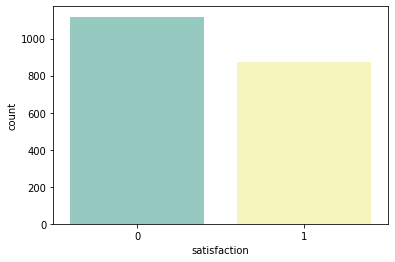

In [ ]:
ax= sns.countplot(x=y_test, palette="Set3")

In [ ]:
log_reg = LogisticRegression(random_state=0, solver='lbfgs')
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
log_reg.predict(x_train)
y_pred=log_reg.predict(x_train)

In [ ]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
pred_proba=log_reg.predict_proba(x_train)

In [ ]:
pred_proba

array([[0.92108327, 0.07891673],
       [0.08849794, 0.91150206],
       [0.0027271 , 0.9972729 ],
       ...,
       [0.97728715, 0.02271285],
       [0.33526908, 0.66473092],
       [0.99086392, 0.00913608]])

In [ ]:
log_reg.coef_.shape

(1, 60)

In [ ]:
print("The Training Accuracy is",log_reg.score(x_train,y_train))

The Training Accuracy is 0.9032663316582915


In [ ]:
print("The Testing Accuracy is",log_reg.score(x_test,y_test))

The Testing Accuracy is 0.8849246231155778


In [ ]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4493
           1       0.91      0.86      0.89      3467

    accuracy                           0.90      7960
   macro avg       0.90      0.90      0.90      7960
weighted avg       0.90      0.90      0.90      7960



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
	cm=confusion_matrix(y_train,y_pred)

In [ ]:
cm

array([[4193,  300],
       [ 470, 2997]])

In [ ]:
from seaborn.matrix import heatmap
def plot_confusion_matrix(cm,classes=None,title='Confusion matrix'):
  """Plots a confusion matrix"""
  if classes is not None:
      sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0.,vmax=1,annot=True,annot_kws={'size':50})
  else:
      sns.heatmap(cm,vmin=0.,vmax=1.)
      plt.title(title)
      plt.ylable('True label')
      plt.xlabel('Predicted label')

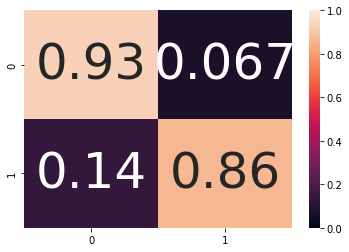

In [ ]:
cm=confusion_matrix(y_train,y_pred)
cm_norm=cm /cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes=log_reg.classes_,title='Confusion matrix')

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
print("The log lost on training dataset is :",log_loss(y_train,pred_proba))

The log lost on training dataset is : 0.24967893341907563


In [ ]:
pred_proba_test=log_reg.predict_proba(x_test)
print("The log lost on testing dataset is :",log_loss(y_test,pred_proba_test))

The log lost on testing dataset is : 0.2773250137678238


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
C_List = np.geomspace(1e-5, 1e5, num=20)
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(x_train, y_train)
print("The Classification Accuracy is:", Log_reg3.score(x_test, y_test))
pred_proba_t = Log_reg3.predict_proba(x_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


The Classification Accuracy is: 0.9246231155778895
The Logistic Loss is:  0.20940030915644509
The optimal C parameter is:  [233.57214691]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=233.57214691)
log_reg3.fit(x_train, y_train)
score = log_reg3.score(x_test, y_test)

pred_proba_t = log_reg3.predict_proba(x_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Accuracy:", score)
print("Log Loss:", log_loss2)

Testing Accuracy: 0.8914572864321608
Log Loss: 0.2526308109386676


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
 scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(x_train) 
scaled_X_test = scaler.transform(x_test)

In [ ]:
 knn_model = KNeighborsClassifier(n_neighbors=1)
 knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
 y_pred = knn_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
 accuracy_score(y_test,y_pred)

0.9095477386934674

In [ ]:
1-accuracy_score(y_test,y_pred)

0.09045226130653261

In [ ]:
 confusion_matrix(y_test,y_pred)

array([[1035,   83],
       [  97,  775]])

In [ ]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1118
           1       0.90      0.89      0.90       872

    accuracy                           0.91      1990
   macro avg       0.91      0.91      0.91      1990
weighted avg       0.91      0.91      0.91      1990



In [ ]:
 from sklearn.model_selection import GridSearchCV

In [ ]:
scaler = StandardScaler()
knn = KNeighborsClassifier()  

In [ ]:
 knn.get_params().keys() 

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
 operations = [('scaler',scaler),('knn',knn)] 
 print(operations)

[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]


In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations) 
print(pipe)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])


In [ ]:
 k_values = list(range(1,30))
param_grid = {'knn__n_neighbors': k_values} 
print(param_grid)

{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}


In [ ]:
 full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy') 
 full_cv_classifier.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [ ]:
full_cv_classifier.best_estimator_.get_params()

{'knn': KNeighborsClassifier(),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False}

In [ ]:
 full_cv_classifier.cv_results_['mean_test_score']

array([0.91859296, 0.91218593, 0.92148241, 0.91708543, 0.92537688,
       0.9218593 , 0.92537688, 0.92273869, 0.92361809, 0.9218593 ,
       0.92349246, 0.91997487, 0.92286432, 0.91934673, 0.9218593 ,
       0.91884422, 0.92160804, 0.91959799, 0.9209799 , 0.91859296,
       0.91997487, 0.91834171, 0.91871859, 0.91733668, 0.91871859,
       0.91633166, 0.91633166, 0.91532663, 0.91520101])

In [ ]:
 scaler = StandardScaler()
knn5 = KNeighborsClassifier(n_neighbors=5) 
operations = [('scaler',scaler),('knn5',knn5)]

In [ ]:
 pipe = Pipeline(operations) 
 pipe.fit(x_train,y_train) 
 pipe_pred = pipe.predict(x_test)

In [ ]:
 accuracy_score(y_test,pipe_pred)

0.9226130653266331

In [ ]:
1 - accuracy_score(y_test,pipe_pred)

0.07738693467336688